# TPC-C Multi-Tenant with Distributed PVC and Tuned PostgreSQL 17.5

* data is generated and loaded into databases in a distributed filesystem
* experiments do not use preloaded data

* PostgreSQL uses improved args:
```
# --- Connection & Worker Processes ---
- "-c"
- "max_connections=1500"       # https://www.postgresql.org/docs/current/runtime-config-connection.html#GUC-MAX-CONNECTIONS
- "-c"
- "max_worker_processes=128"   # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-MAX-WORKER-PROCESSES
- "-c"
- "max_parallel_workers=64"    # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-MAX-PARALLEL-WORKERS
- "-c"
- "max_parallel_workers_per_gather=8"  # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-MAX-PARALLEL-WORKERS-PER-GATHER
- "-c"
- "max_parallel_maintenance_workers=8" # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-MAX-PARALLEL-MAINTENANCE-WORKERS

# --- Memory Settings ---
- "-c"
- "shared_buffers=256GB"       # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-SHARED-BUFFERS
- "-c"
- "effective_cache_size=350GB" # https://www.postgresql.org/docs/current/runtime-config-query.html#GUC-EFFECTIVE-CACHE-SIZE
- "-c"
- "work_mem=128MB"             # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-WORK-MEM
- "-c"
- "maintenance_work_mem=4GB"   # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-MAINTENANCE-WORK-MEM
- "-c"
- "temp_buffers=64MB"          # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-TEMP-BUFFERS
- "-c"
- "wal_buffers=16MB"           # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-WAL-BUFFERS
- "-c"
- "autovacuum_work_mem=1GB"    # https://www.postgresql.org/docs/current/runtime-config-autovacuum.html#GUC-AUTOVACUUM-WORK-MEM

# --- Autovacuum ---
- "-c"
- "autovacuum=on"                            # https://www.postgresql.org/docs/current/runtime-config-autovacuum.html#GUC-AUTOVACUUM
- "-c"
- "autovacuum_max_workers=10"               # https://www.postgresql.org/docs/current/runtime-config-autovacuum.html#GUC-AUTOVACUUM-MAX-WORKERS
- "-c"
- "autovacuum_vacuum_cost_limit=1000"       # https://www.postgresql.org/docs/current/runtime-config-autovacuum.html#GUC-AUTOVACUUM-VACUUM-COST-LIMIT
- "-c"
- "vacuum_cost_limit=1000"                  # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-VACUUM-COST-LIMIT
- "-c"
- "autovacuum_naptime=15s"                  # https://www.postgresql.org/docs/current/runtime-config-autovacuum.html#GUC-AUTOVACUUM-NAPTIME
- "-c"
- "autovacuum_vacuum_cost_delay=20ms"       # https://www.postgresql.org/docs/current/runtime-config-autovacuum.html#GUC-AUTOVACUUM-VACUUM-COST-DELAY

# --- WAL & Checkpoints (Ceph-optimized) ---
- "-c"
- "wal_level=replica"                       # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-WAL-LEVEL
- "-c"
- "wal_compression=on"                      # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-WAL-COMPRESSION
- "-c"
- "wal_writer_delay=500ms"                  # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-WAL-WRITER-DELAY
- "-c"
- "commit_delay=10000"                      # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-COMMIT-DELAY
- "-c"
- "synchronous_commit=off"                  # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-SYNCHRONOUS-COMMIT
- "-c"
- "max_wal_size=2GB"                        # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-MAX-WAL-SIZE
- "-c"
- "min_wal_size=1GB"                        # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-MIN-WAL-SIZE
- "-c"
- "checkpoint_timeout=15min"                # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-CHECKPOINT-TIMEOUT
- "-c"
- "checkpoint_completion_target=0.9"        # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-CHECKPOINT-COMPLETION-TARGET

# --- Planner Cost Tweaks (CephFS) ---
- "-c"
- "random_page_cost=4.0"                    # https://www.postgresql.org/docs/current/runtime-config-query.html#GUC-RANDOM-PAGE-COST
- "-c"
- "seq_page_cost=1.5"                       # https://www.postgresql.org/docs/current/runtime-config-query.html#GUC-SEQ-PAGE-COST
- "-c"
- "cpu_tuple_cost=0.01"                     # https://www.postgresql.org/docs/current/runtime-config-query.html#GUC-CPU-TUPLE-COST
- "-c"
- "effective_io_concurrency=2"              # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-EFFECTIVE-IO-CONCURRENCY
- "-c"
- "default_statistics_target=500"           # https://www.postgresql.org/docs/current/runtime-config-query.html#GUC-DEFAULT-STATISTICS-TARGET

# --- Locks and Limits ---
- "-c"
- "max_locks_per_transaction=128"           # https://www.postgresql.org/docs/current/runtime-config-locks.html#GUC-MAX-LOCKS-PER-TRANSACTION
- "-c"
- "max_pred_locks_per_transaction=128"      # https://www.postgresql.org/docs/current/runtime-config-locks.html#GUC-MAX-PRED-LOCKS-PER-TRANSACTION
- "-c"
- "max_stack_depth=7MB"                     # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-MAX-STACK-DEPTH
- "-c"
- "max_files_per_process=4000"              # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-MAX-FILES-PER-PROCESS

# --- Miscellaneous ---
- "-c"
- "huge_pages=try"                          # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-HUGE-PAGES
```

In [1]:
import pandas as pd
pd.set_option("display.max_rows", None)
pd.set_option('display.max_colwidth', None)
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

from bexhoma import collectors

%matplotlib inline

# Functions for Nice Plots

In [2]:
def sanitize_filename(title, max_length=100):
    # Replace non-alphanumeric characters with underscores
    safe = re.sub(r'[^a-zA-Z0-9-_]+', '_', title.strip())
    # Truncate to a safe length
    return safe[:max_length].rstrip('_')
    
def plot_bars(df, y, title, estimator):
    df_plot = df.copy()
    #df_plot = df_plot[df_plot['client']=='1']
    df_plot = df_plot.sort_values(['num_tenants','type'])
    # Hatch styles for each type
    hatch_map = {
        'container': '/',
        'database': '\\',
        'schema': 'x'
    }
    hue_order = ['container', 'database', 'schema']
    # Create the plot
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        data=df_plot,
        x='num_tenants',
        y=y,
        hue='type',
        estimator=estimator,
        palette='Set2',
        hue_order=hue_order
    )
    show_height = False
    if show_height:
        for bar in ax.patches:
            height = bar.get_height()
            if height > 0:
                ax.text(
                    bar.get_x() + bar.get_width() / 2,  # X: center of bar
                    height,                             # Y: top of bar
                    f'{height:.1f}',                    # Text (1 decimal place)
                    ha='center', va='bottom', fontsize=8
                )
    # Get tick positions (i.e., the x-axis categories)
    xticks = ax.get_xticks()
    bar_width = ax.patches[0].get_width()
    # Create a mapping from (num_tenants, type) to hatch
    grouped = df_plot.groupby(['num_tenants', 'type']).agg({y: estimator}).reset_index()
    #print(grouped)
    grouped_dict = {(row['num_tenants'], row['type']): hatch_map[row['type']] for _, row in grouped.iterrows()}
    bars = sorted(ax.patches, key=lambda bar: bar.get_x() if bar.get_height() > 0 else 10000)
    for bar, (_, row) in zip(bars, grouped.iterrows()):
        bar.my_id = (row['num_tenants'], row['type'])  # or anything else like an index or uuid
        bar.set_hatch(hatch_map[row['type']]) #grouped_dict[(bar.my_id)])
        bar.set_edgecolor('black')
        bar.set_linewidth(1)
    handles, labels = ax.get_legend_handles_labels()
    for handle, label in zip(handles, labels):
        hatch = hatch_map.get(label, '')
        handle.set_hatch(hatch)
    # Final touches
    plt.legend(title='Type')
    ax.legend(fontsize=18)
    #ax.legend(fontsize=18, loc='upper left', bbox_to_anchor=(1, 1))  # move outside
    plt.title(f"{title}", fontsize=24)
    #plt.title(f"{title} by Number of Tenants and Type", fontsize=24)
    plt.xlabel("Number of Tenants", fontsize=18)
    ax.tick_params(axis='both', labelsize=16)
    # Remove y-axis label
    ax.set_ylabel('')  # or ax.set(ylabel='')
    plt.tight_layout()
    filename = "tpcc_" + filename_prefix + sanitize_filename(title) + ".png"    
    plt.savefig(filename, dpi=300, bbox_inches="tight")
    plt.show()

def plot_boxplots(df, y, title):
    plt.figure(figsize=(10, 6))
    # Hatch styles for each type
    hatch_map = {
        'container': '/',
        'database': '\\',
        'schema': 'x'
    }
    hue_order = ['container', 'database', 'schema']
    
    # Plot boxplots grouped by num_tenants and colored by type
    ax = sns.boxplot(
        data=df,
        x='num_tenants',
        y=y,#'Goodput (requests/second)',
        hue='type',
        palette='Set2'  # consistent colors per type
    )
    # Add vertical separator lines between groups
    # Get the number of unique num_tenants and type
    num_groups = df['num_tenants'].nunique()
    num_types = df['type'].nunique()
    
    # Extract hue order
    hue_order = ax.get_legend_handles_labels()[1]
    num_hue = len(hue_order)
    
    # Get hue order from seaborn (types)
    _, type_order = ax.get_legend_handles_labels()
    num_types = len(type_order)
    
    #print(len(ax.patches))
    # Set hatches correctly: patches are grouped by x then by hue
    for i, patch in enumerate(ax.patches):
        #print(i)
        type_index = i // (num_groups)
        if type_index >= num_types:
            break
        type_name = type_order[type_index]
        patch.set_hatch(hatch_map.get(type_name, ''))
        #print(hatch_map.get(type_name, ''))
        patch.set_edgecolor('black')
        patch.set_linewidth(1)
    
    # Each num_tenants group has num_types boxes
    for i in range(1, num_groups):
        xpos = i - 0.5 #0.5
        ax.axvline(x=xpos, color='gray', linestyle='--', alpha=0.5)
    
    
    # Update legend with matching hatches
    handles, labels = ax.get_legend_handles_labels()
    for handle, label in zip(handles, labels):
        hatch = hatch_map.get(label, '')
        handle.set_hatch(hatch)
        handle.set_edgecolor('black')
        handle.set_linewidth(1)
    
    #title = "Goodput [req/s] Distribution per Tenant"
    plt.title(title, fontsize=24)
    plt.xlabel("Number of Tenants")
    plt.ylabel("")#"Goodput (requests/second)")
    plt.xlabel("Number of Tenants", fontsize=18)
    ax.tick_params(axis='both', labelsize=16)
    plt.legend(title="Type")
    ax.legend(fontsize=18)
    plt.tight_layout()
    filename = "tpcc_" + filename_prefix + sanitize_filename(title) + ".png"    
    plt.savefig(filename, dpi=300, bbox_inches="tight")
    plt.show()

# Collect Results

In [3]:
path = r"C:\data\benchmarks"
#path = r"/home/perdelt/benchmarks"
filename_prefix = "cpupolicy_"

In [4]:
codes = [
"1753277819","1753284808","1753292344","1753300385","1753308797","1753317513","1753326800","1753337410","1753279518","1753286610","1753294275","1753302473","1753310896","1753319860","1753329375","1753340173","1753281247","1753288480","1753296266","1753304605","1753313115","1753321584","1753331918","1753282948","1753290475","1753298355","1753306706","1753315334","1753324378","1753334504"
]

codes

['1753277819',
 '1753284808',
 '1753292344',
 '1753300385',
 '1753308797',
 '1753317513',
 '1753326800',
 '1753337410',
 '1753279518',
 '1753286610',
 '1753294275',
 '1753302473',
 '1753310896',
 '1753319860',
 '1753329375',
 '1753340173',
 '1753281247',
 '1753288480',
 '1753296266',
 '1753304605',
 '1753313115',
 '1753321584',
 '1753331918',
 '1753282948',
 '1753290475',
 '1753298355',
 '1753306706',
 '1753315334',
 '1753324378',
 '1753334504']

In [5]:
collect = collectors.benchbase(path, codes)

# Monitoring as Time Series

<Axes: >

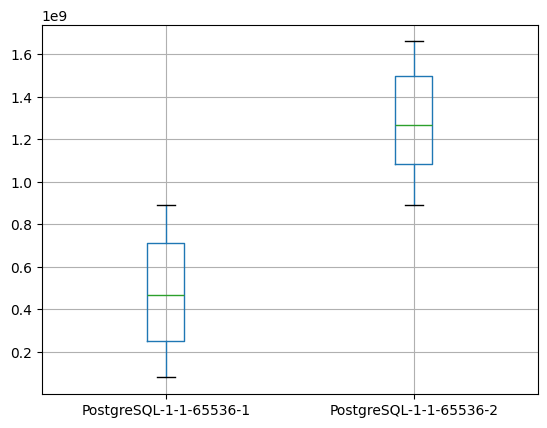

In [6]:
metric = 'pg_stat_database_blks_hit'
#metric = 'pg_stat_database_blks_reads'
#metric = 'pg_stat_activity_count_idle_transaction'
code = codes[0]
df_monitoring = collect.get_monitoring_timeseries_single(code, metric=metric)

#df_monitoring.plot(title=metric)
df_monitoring.boxplot()

<Axes: title={'center': 'pg_stat_activity_count_idle_transaction'}>

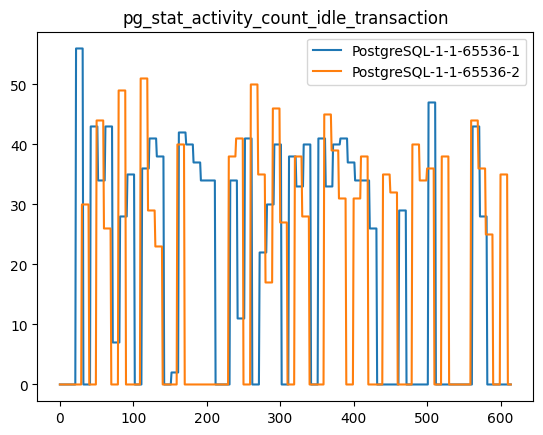

In [7]:
metric = 'pg_stat_database_blks_hit'
metric = 'pg_stat_activity_count_idle_transaction'
code = codes[0]
df_monitoring = collect.get_monitoring_timeseries_single(code, metric=metric)

df_monitoring.plot(title=metric)

In [8]:
df_performance = collect.get_monitoring_single_all("stream")
df_performance

CPU [CPUs]  CPU Throttled  Max CPU  Max RAM [Gb]  \
PostgreSQL-1-1-65536-0-1    10252.49            0.0    19.80         10.27   
PostgreSQL-1-1-65536-0-2     9472.46            0.0    20.37         12.66   
PostgreSQL-1-1-65536-1       9819.37            0.0    20.21          9.87   
PostgreSQL-1-1-65536-2       9139.90            0.0    16.82         12.27   
PostgreSQL-1-1-65536-1      10805.14            0.0    22.59         10.23   
PostgreSQL-1-1-65536-2       9690.51            0.0    21.79         12.49   
PostgreSQL-1-1-65536-0-1     8679.05            0.0    14.20          9.54   
PostgreSQL-1-1-65536-0-2     7455.31            0.0    17.39         11.31   
PostgreSQL-1-1-65536-1-1     8510.96            0.0    17.22          9.45   
PostgreSQL-1-1-65536-1-2     7283.68            0.0    16.42         11.28   
PostgreSQL-1-1-65536-1      12663.66            0.0    24.07         13.23   
PostgreSQL-1-1-65536-2       8457.31            0.0    22.40         15.34   
PostgreSQL-1-1-65536-1      10968.99            0.0    23.27         13.00   
PostgreSQL-1-1-65536-2       8816.80            0.0    20.35         14.94   
PostgreSQL-1-1-65536-0-1     7428.28            0.0    16.36          9.05   
PostgreSQL-1-1-65536-0-2     7314.06            0.0    14.36         10.65   
PostgreSQL-1-1-65536-1-1     7937.09            0.0    17.37          9.35   
PostgreSQL-1-1-65536-1-2     7421.52            0.0    16.28         10.93   
PostgreSQL-1-1-65536-2-1     7329.91            0.0    17.42          8.95   
PostgreSQL-1-1-65536-2-2     7385.03            0.0    16.46         10.85   
PostgreSQL-1-1-65536-1      13892.28            0.0    29.88         16.46   
PostgreSQL-1-1-65536-2      13861.99            0.0    28.62         19.93   
PostgreSQL-1-1-65536-1      12123.96            0.0    27.58         16.09   
PostgreSQL-1-1-65536-2       9907.10            0.0    26.38         18.34   
PostgreSQL-1-1-65536-0-1     7215.75            0.0    14.53          9.09   
PostgreSQL-1-1-65536-0-2     5661.22            0.0    13.13         10.25   
PostgreSQL-1-1-65536-1-1     7354.75            0.0    13.70          9.05   
PostgreSQL-1-1-65536-1-2     6413.27            0.0    13.52         10.50   
PostgreSQL-1-1-65536-2-1     6848.36            0.0    13.61          9.00   
PostgreSQL-1-1-65536-2-2     5931.59            0.0    14.87         10.14   
PostgreSQL-1-1-65536-3-1     7334.75            0.0    14.14          9.08   
PostgreSQL-1-1-65536-3-2     6268.41            0.0    16.89         10.70   
PostgreSQL-1-1-65536-1      13557.00            0.0    31.96         19.34   
PostgreSQL-1-1-65536-2      12634.34            0.0    28.54         22.55   
PostgreSQL-1-1-65536-1      10484.06            0.0    31.42         18.50   
PostgreSQL-1-1-65536-2      11945.45            0.0    28.95         21.89   
PostgreSQL-1-1-65536-0-1     6015.12            0.0    11.54          8.71   
PostgreSQL-1-1-65536-0-2     5722.77            0.0    11.68          9.88   
PostgreSQL-1-1-65536-1-1     5714.85            0.0    10.89          8.55   
PostgreSQL-1-1-65536-1-2     6108.48            0.0    11.48          9.91   
PostgreSQL-1-1-65536-2-1     5654.29            0.0    11.40          8.68   
PostgreSQL-1-1-65536-2-2     5663.12            0.0    11.34          9.87   
PostgreSQL-1-1-65536-3-1     6257.51            0.0    11.27          8.80   
PostgreSQL-1-1-65536-3-2     5968.47            0.0    11.46         10.01   
PostgreSQL-1-1-65536-4-1     5877.87            0.0    11.01          8.63   
PostgreSQL-1-1-65536-4-2     5672.21            0.0    11.57         10.03   
PostgreSQL-1-1-65536-1      13501.19            0.0    35.79         22.14   
PostgreSQL-1-1-65536-2      13235.47            0.0    32.80         25.63   
PostgreSQL-1-1-65536-1      10850.13            0.0    31.57         21.71   
PostgreSQL-1-1-65536-2       8847.88            0.0    26.24         23.90   
PostgreSQL-1-1-65536-0-1     5339.36            

# Monitoring Aggregated Values

In [57]:
df_performance = collect.get_monitoring_all("stream")

df_performance_first = df_performance[df_performance['client']=='1']
df_performance_second = df_performance[df_performance['client']=='2']

df_performance#[['Max CPU', 'client', 'type', 'num_tenants']]

client  CPU [CPUs]  Max RAM [Gb]  Max RAM Cached [Gb]  Max CPU  \
0      1    10252.49         10.27                20.51    19.80   
1      2     9472.46         12.66                24.22    20.37   
0      1     9819.37          9.87                19.65    20.21   
1      2     9139.90         12.27                25.92    16.82   
0      1    10805.14         10.23                21.41    22.59   
1      2     9690.51         12.49                24.67    21.79   
0      1    17190.01         18.99                37.28    31.42   
1      2    14738.99         22.59                43.91    33.81   
0      1    12663.66         13.23                29.74    24.07   
1      2     8457.31         15.34                30.36    22.40   
0      1    10968.99         13.00                27.64    23.27   
1      2     8816.80         14.94                30.21    20.35   
0      1    22695.28         27.35                51.43    51.15   
1      2    22120.61         32.43                60.70    47.10   
0      1    13892.28         16.46                37.64    29.88   
1      2    13861.99         19.93                51.25    28.62   
0      1    12123.96         16.09                32.70    27.58   
1      2     9907.10         18.34                38.53    26.38   
0      1    28753.61         36.22                63.83    55.98   
1      2    24274.49         41.59                71.66    58.41   
0      1    13557.00         19.34                39.82    31.96   
1      2    12634.34         22.55                44.44    28.54   
0      1    10484.06         18.50                36.63    31.42   
1      2    11945.45         21.89                42.98    28.95   
0      1    29519.64         43.37                69.10    56.11   
1      2    29135.05         49.70                81.81    57.53   
0      1    13501.19         22.14                46.21    35.79   
1      2    13235.47         25.63                49.17    32.80   
0      1    10850.13         21.71                41.96    31.57   
1      2     8847.88         23.90                44.29    26.24   
0      1    31868.89         50.73                78.48    57.70   
1      2    32079.23         57.68                93.45    58.18   
0      1    15892.58         26.07                51.88    36.48   
1      2    14874.82         29.90                55.95    37.53   
0      1    15961.53         26.84                54.04    35.82   
1      2    13552.54         29.97                55.56    32.44   
0      1    31782.91         58.35                87.76    59.76   
1      2    31959.39         64.89               102.68    58.21   
0      1    17412.42         29.79                62.09    37.23   
1      2    14662.69         32.46                58.70    33.74   
0      1    13961.91         28.81                55.84    35.46   
1      2     9988.66         31.24                56.21    32.55   
0      1    33888.22         65.37                97.64    59.87   
1      2    31330.43         71.93               111.65    63.39   
0      1    15905.61         32.21                63.47    37.14   
1      2    12466.94         34.71                61.48    35.50   
0      1     8727.47         28.13                56.26    19.33   
1      2        0.00          9.23                37.70     0.00   
0      1    31675.06         72.54               106.29    58.70   
1      2    32941.12         79.48               122.98    60.56   
0      1    11532.52         32.07                64.77    27.12   
1      2    11007.52         35.41                71.34    27.47   
0      1     9062.82         31.03                55.73    21.23   
1      2     7091.20         33.17                58.15    18.85   
0      1    32454.35         79.99               117.46    59.40   
1      2    32765.65         86.38               131.00    63.40   
0      1    10356.22         34.21                67.87    28.63   
1      2     9827.41         36.64                72.88   

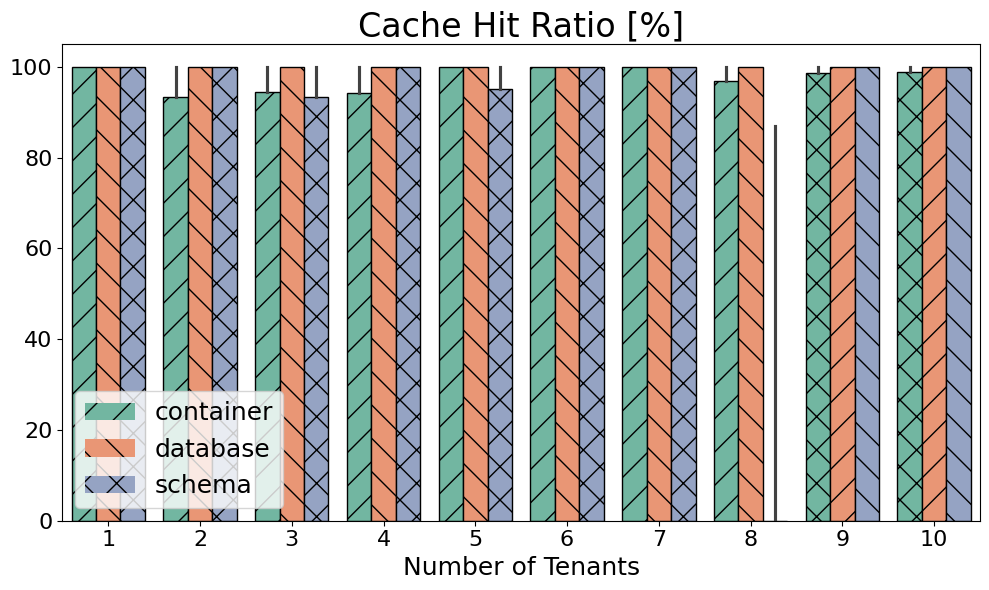

In [10]:
plot_bars(df_performance.fillna(0), y='Cache Hit Ratio [%]', title='Cache Hit Ratio [%]', estimator='min')

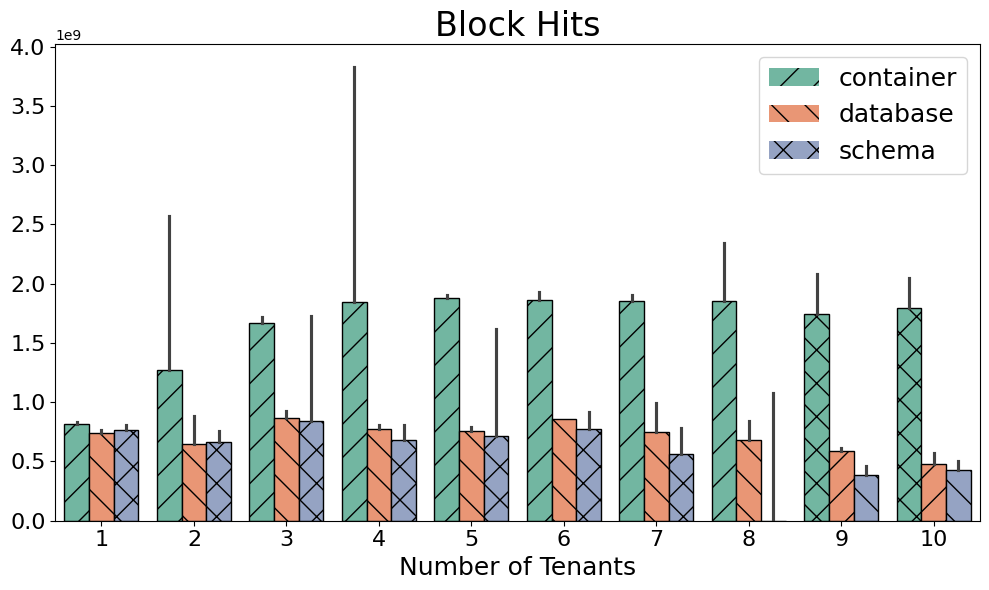

In [11]:
plot_bars(df_performance, y='Block Hits', title='Block Hits', estimator='min')

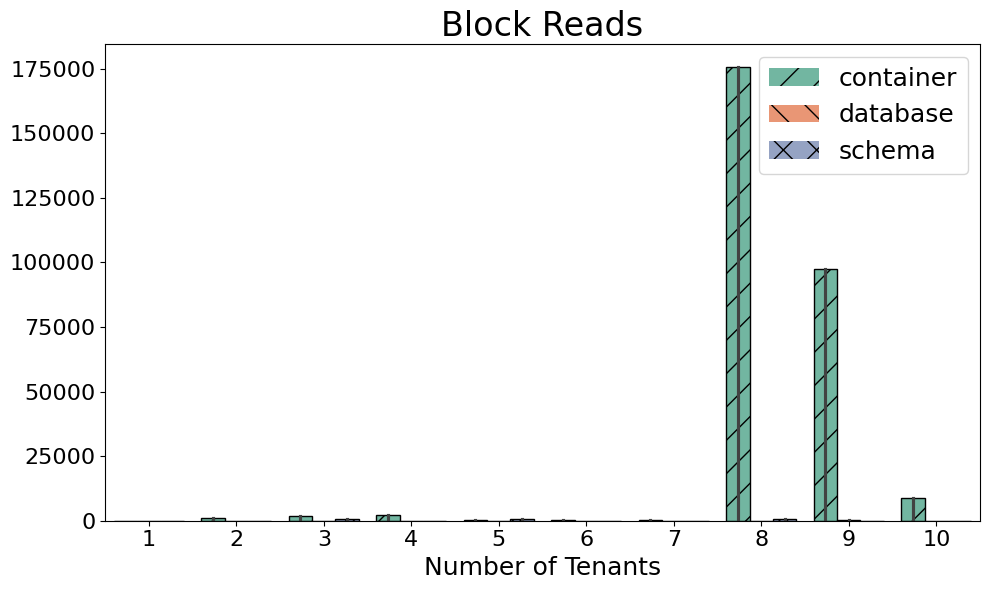

In [12]:
plot_bars(df_performance, y='Block Reads', title='Block Reads', estimator='max')

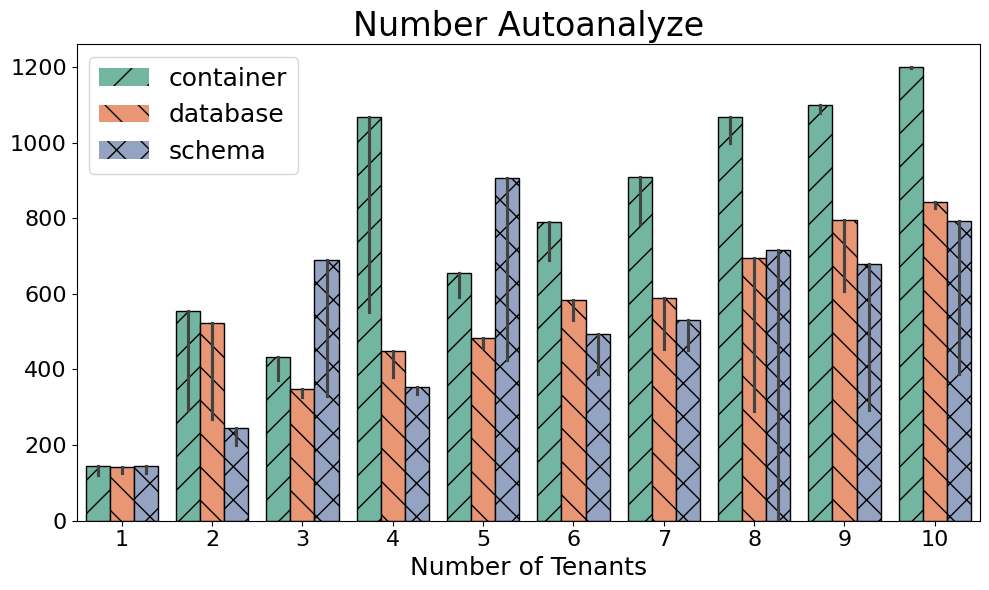

In [13]:
plot_bars(df_performance, y='Number Autoanalyze', title='Number Autoanalyze', estimator='max')

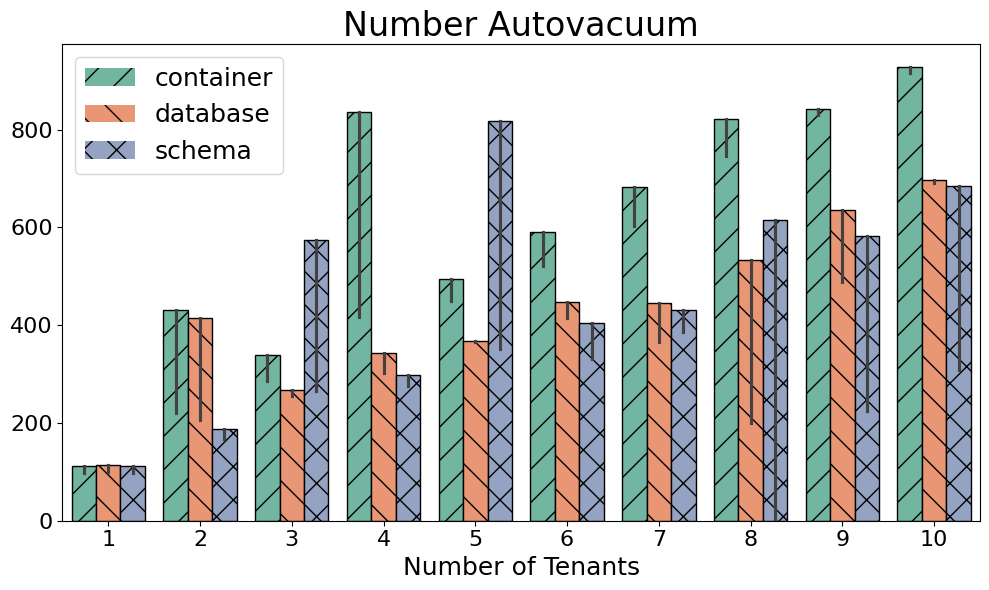

In [14]:
plot_bars(df_performance, y='Number Autovacuum', title='Number Autovacuum', estimator='max')

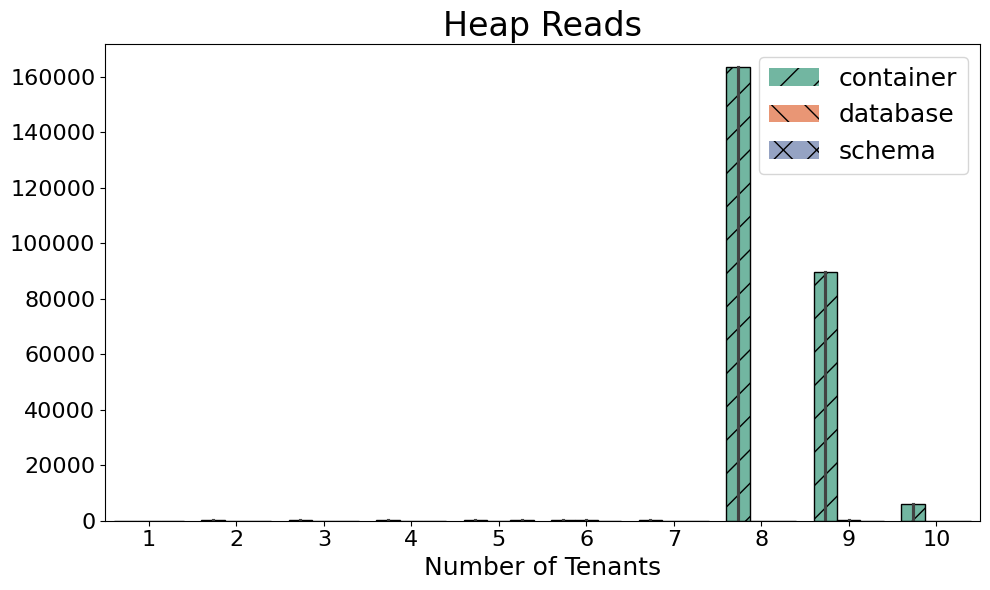

In [15]:
plot_bars(df_performance, y='Heap Reads', title='Heap Reads', estimator='max')

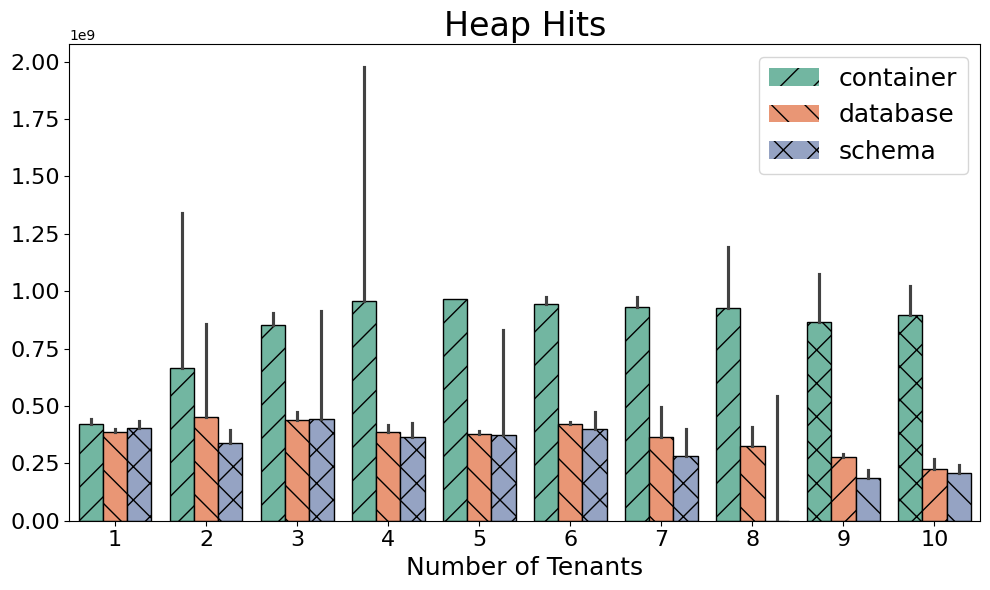

In [16]:
plot_bars(df_performance, y='Heap Hits', title='Heap Hits', estimator='min')

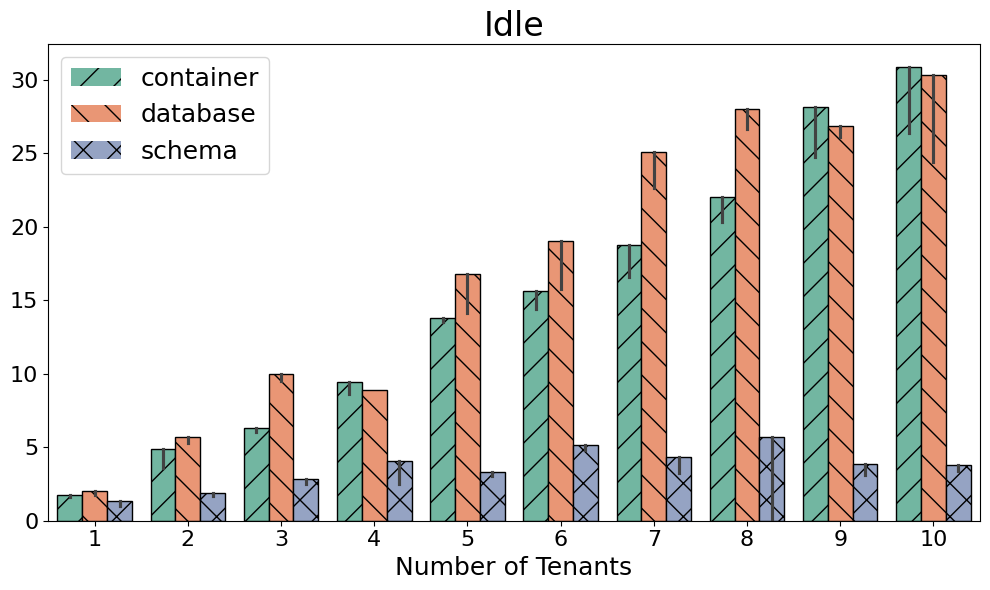

In [17]:
plot_bars(df_performance, y='Idle', title='Idle', estimator='max')

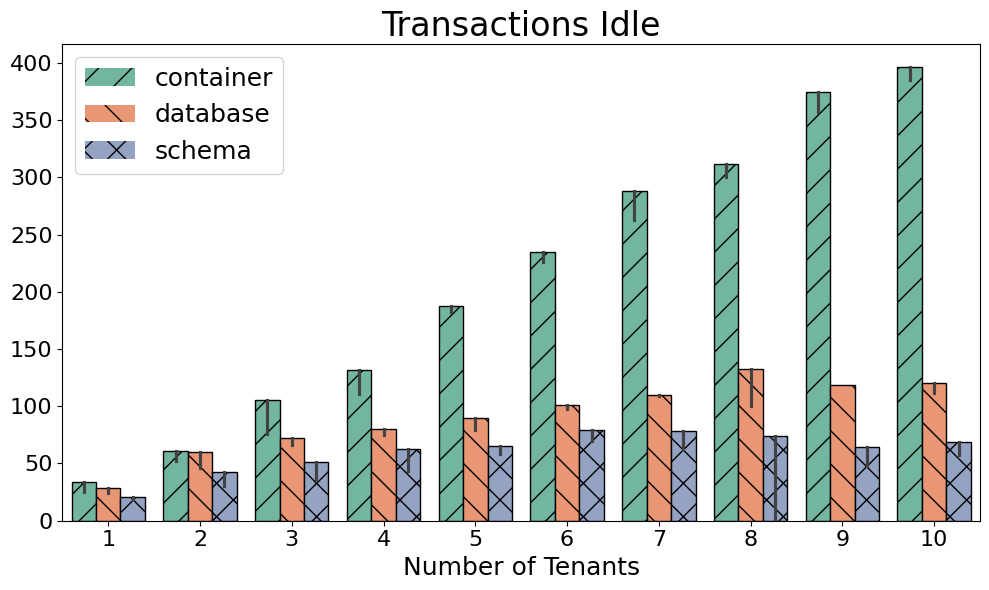

In [18]:
plot_bars(df_performance, y='Transactions Idle', title='Transactions Idle', estimator='max')

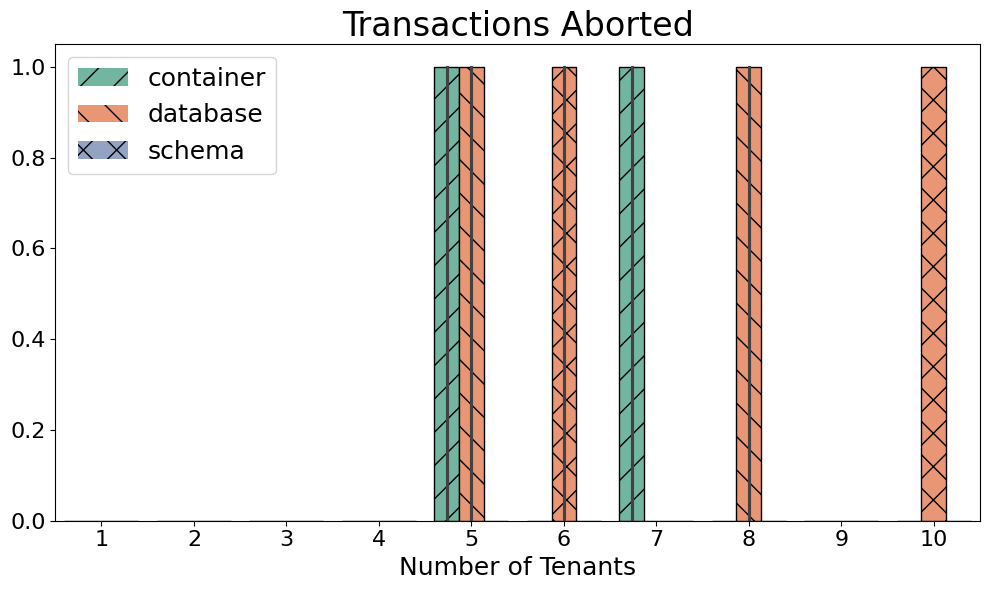

In [19]:
plot_bars(df_performance, y='Transactions Aborted', title='Transactions Aborted', estimator='max')

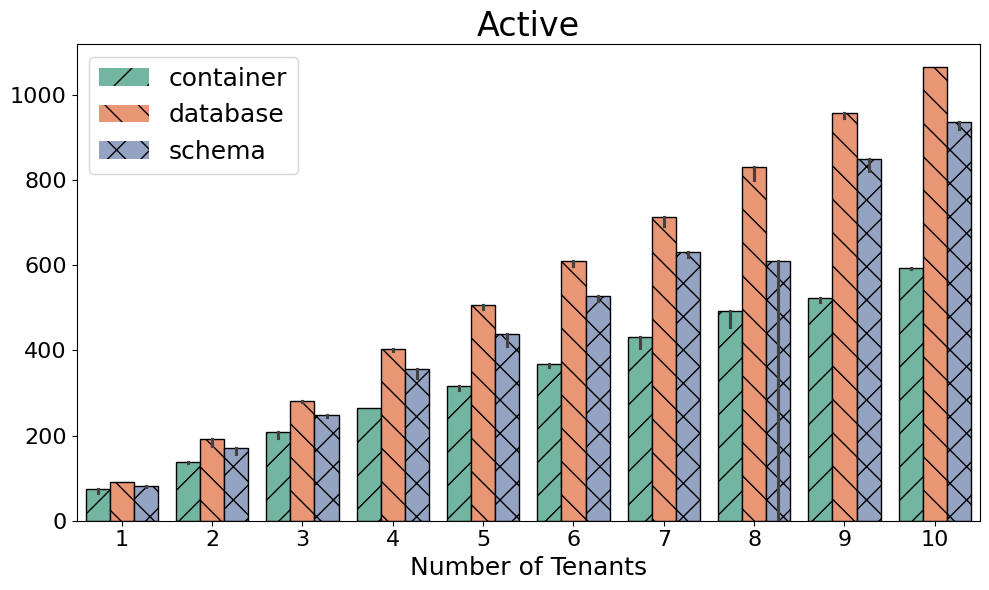

In [20]:
plot_bars(df_performance, y='Active', title='Active', estimator='max')

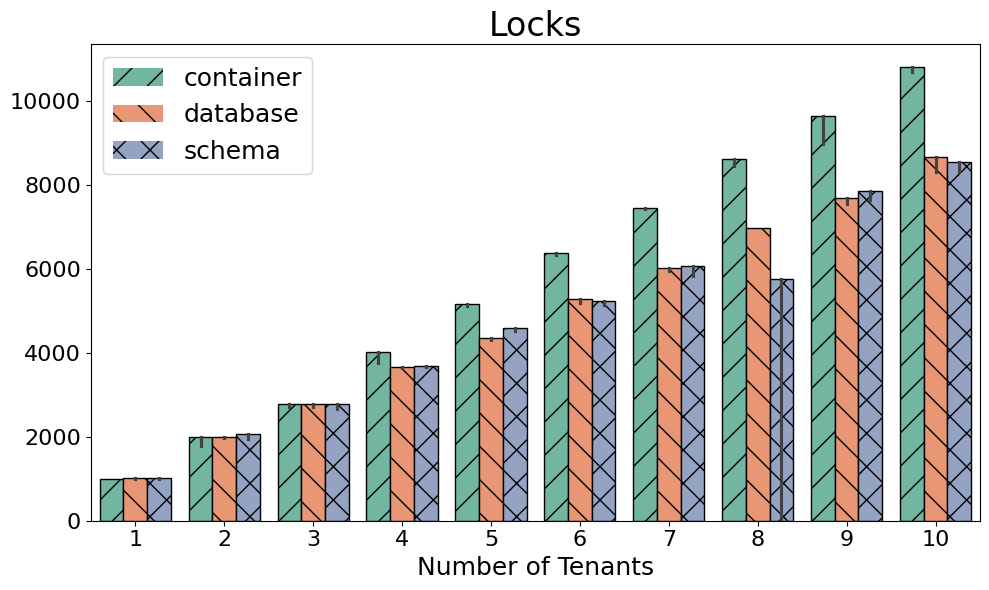

In [21]:
plot_bars(df_performance, y='Locks', title='Locks', estimator='max')

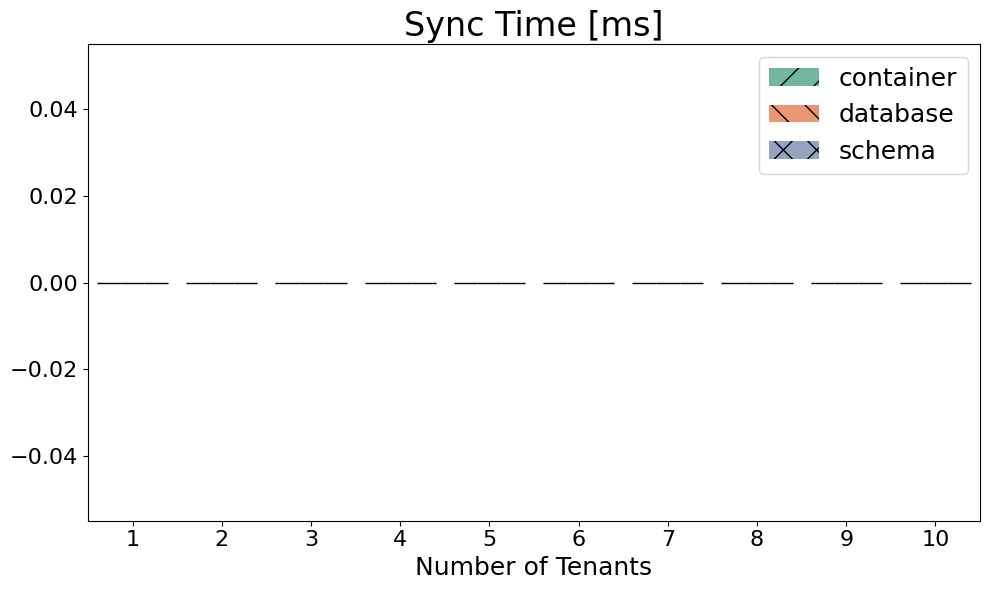

In [22]:
plot_bars(df_performance, y='Sync Time', title='Sync Time [ms]', estimator='max')

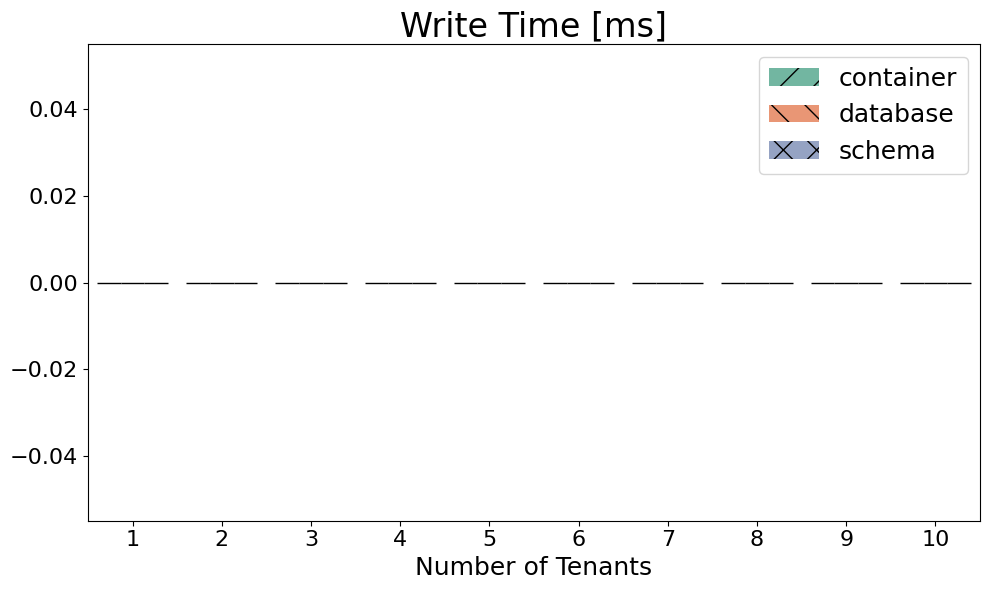

In [23]:
plot_bars(df_performance, y='Write Time', title='Write Time [ms]', estimator='max')

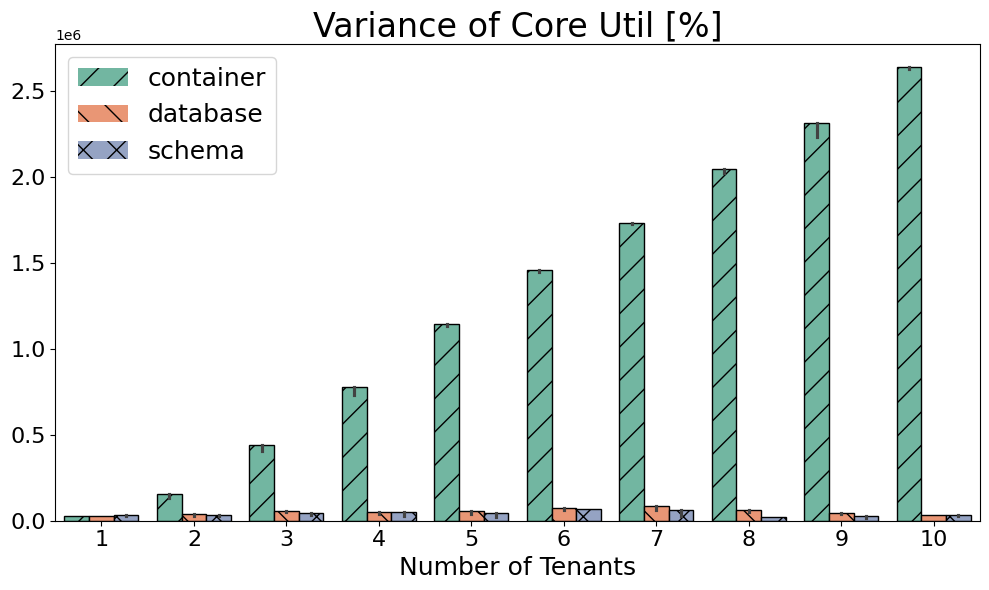

In [24]:
plot_bars(df_performance, y='Variance of Core Util [%]', title='Variance of Core Util [%]', estimator='max')

# Performance Results per Tenant

In [25]:
df_performance = collect.get_performance_all_single()

df_performance_first = df_performance[df_performance['client']=='1']
df_performance_second = df_performance[df_performance['client']=='2']

df_performance

connection           configuration  \
connection_pod                                                                 
PostgreSQL-1-1-65536-0-1-1  PostgreSQL-1-1-65536-0-1  PostgreSQL-1-1-65536-0   
PostgreSQL-1-1-65536-0-2-1  PostgreSQL-1-1-65536-0-2  PostgreSQL-1-1-65536-0   
PostgreSQL-1-1-65536-1-1      PostgreSQL-1-1-65536-1    PostgreSQL-1-1-65536   
PostgreSQL-1-1-65536-2-1      PostgreSQL-1-1-65536-2    PostgreSQL-1-1-65536   
PostgreSQL-1-1-65536-1-1      PostgreSQL-1-1-65536-1    PostgreSQL-1-1-65536   
PostgreSQL-1-1-65536-2-1      PostgreSQL-1-1-65536-2    PostgreSQL-1-1-65536   
PostgreSQL-1-1-65536-1-1-1  PostgreSQL-1-1-65536-1-1  PostgreSQL-1-1-65536-1   
PostgreSQL-1-1-65536-0-1-1  PostgreSQL-1-1-65536-0-1  PostgreSQL-1-1-65536-0   
PostgreSQL-1-1-65536-1-2-1  PostgreSQL-1-1-65536-1-2  PostgreSQL-1-1-65536-1   
PostgreSQL-1-1-65536-0-2-1  PostgreSQL-1-1-65536-0-2  PostgreSQL-1-1-65536-0   
PostgreSQL-1-1-65536-1-1      PostgreSQL-1-1-65536-1    PostgreSQL-1-1-65536   
PostgreSQL-1-1-65536-1-2      PostgreSQL-1-1-65536-1    PostgreSQL-1-1-65536   
PostgreSQL-1-1-65536-2-1      PostgreSQL-1-1-65536-2    PostgreSQL-1-1-65536   
PostgreSQL-1-1-65536-2-2      PostgreSQL-1-1-65536-2    PostgreSQL-1-1-65536   
PostgreSQL-1-1-65536-1-1      PostgreSQL-1-1-65536-1    PostgreSQL-1-1-65536   
PostgreSQL-1-1-65536-1-2      PostgreSQL-1-1-65536-1    PostgreSQL-1-1-65536   
PostgreSQL-1-1-65536-2-1      PostgreSQL-1-1-65536-2    PostgreSQL-1-1-65536   
PostgreSQL-1-1-65536-2-2      PostgreSQL-1-1-65536-2    PostgreSQL-1-1-65536   
PostgreSQL-1-1-65536-1-1-1  PostgreSQL-1-1-65536-1-1  PostgreSQL-1-1-65536-1   
PostgreSQL-1-1-65536-0-1-1  PostgreSQL-1-1-65536-0-1  PostgreSQL-1-1-65536-0   
PostgreSQL-1-1-65536-2-1-1  PostgreSQL-1-1-65536-2-1  PostgreSQL-1-1-65536-2   
PostgreSQL-1-1-65536-1-2-1  PostgreSQL-1-1-65536-1-2  PostgreSQL-1-1-65536-1   
PostgreSQL-1-1-65536-2-2-1  PostgreSQL-1-1-65536-2-2  PostgreSQL-1-1-65536-2   
PostgreSQL-1-1-65536-0-2-1  PostgreSQL-1-1-65536-0-2  PostgreSQL-1-1-65536-0   
PostgreSQL-1-1-65536-1-1      PostgreSQL-1-1-65536-1    PostgreSQL-1-1-65536   
PostgreSQL-1-1-65536-1-2      PostgreSQL-1-1-65536-1    PostgreSQL-1-1-65536   
PostgreSQL-1-1-65536-1-3      PostgreSQL-1-1-65536-1    PostgreSQL-1-1-65536   
PostgreSQL-1-1-65536-2-1      PostgreSQL-1-1-65536-2    PostgreSQL-1-1-65536   
PostgreSQL-1-1-65536-2-2      PostgreSQL-1-1-65536-2    PostgreSQL-1-1-65536   
PostgreSQL-1-1-65536-2-3      PostgreSQL-1-1-65536-2    PostgreSQL-1-1-65536   
PostgreSQL-1-1-65536-1-1      PostgreSQL-1-1-65536-1    PostgreSQL-1-1-65536   
PostgreSQL-1-1-65536-1-2      PostgreSQL-1-1-65536-1    PostgreSQL-1-1-65536   
PostgreSQL-1-1-65536-1-3      PostgreSQL-1-1-65536-1    PostgreSQL-1-1-65536   
PostgreSQL-1-1-65536-2-1      PostgreSQL-1-1-65536-2    PostgreSQL-1-1-65536   
PostgreSQL-1-1-65536-2-2      PostgreSQL-1-1-65536-2    PostgreSQL-1-1-65536   
PostgreSQL-1-1-65536-2-3      PostgreSQL-1-1-65536-2    PostgreSQL-1-1-65536   
PostgreSQL-1-1-65536-1-1-1  PostgreSQL-1-1-65536-1-1  PostgreSQL-1-1-65536-1   
PostgreSQL-1-1-65536-0-1-1  PostgreSQL-1-1-65536-0-1  PostgreSQL-1-1-65536-0   
PostgreSQL-1-1-65536-2-1-1  PostgreSQL-1-1-65536-2-1  PostgreSQL-1-1-65536-2   
PostgreSQL-1-1-65536-3-1-1  PostgreSQL-1-1-65536-3-1  PostgreSQL-1-1-65536-3   
PostgreSQL-1-1-65536-0-2-1  PostgreSQL-1-1-65536-0-2  PostgreSQL-1-1-65536-0   
PostgreSQL-1-1-65536-2-2-1  PostgreSQL-1-1-65536-2-2  PostgreSQL-1-1-65536-2   
PostgreSQL-1-1-65536-1-2-1  PostgreSQL-1-1-65536-1-2  PostgreSQL-1-1-65536-1   
PostgreSQL-1-1-65536-3-2-1  PostgreSQL-1-1-65536-3-2  PostgreSQL-1-1-65536-3   
PostgreSQL-1-1-65536-1-1      PostgreSQL-1-1-65536-1    PostgreSQL-1-1-65536   
PostgreSQL-1-1-65536-1-2      PostgreSQL-1-1-65536-1    PostgreSQL-1-1-65536   
PostgreSQL-1-1-65536-1-3      PostgreSQL-1-1-65536-1    PostgreSQL-1-1-65536   
PostgreSQL-1-1-65536-1-4      PostgreSQL-1-1-65536-1    PostgreSQL-1-1-65536   
PostgreSQL-1-1-65536-2-1      PostgreSQL-1

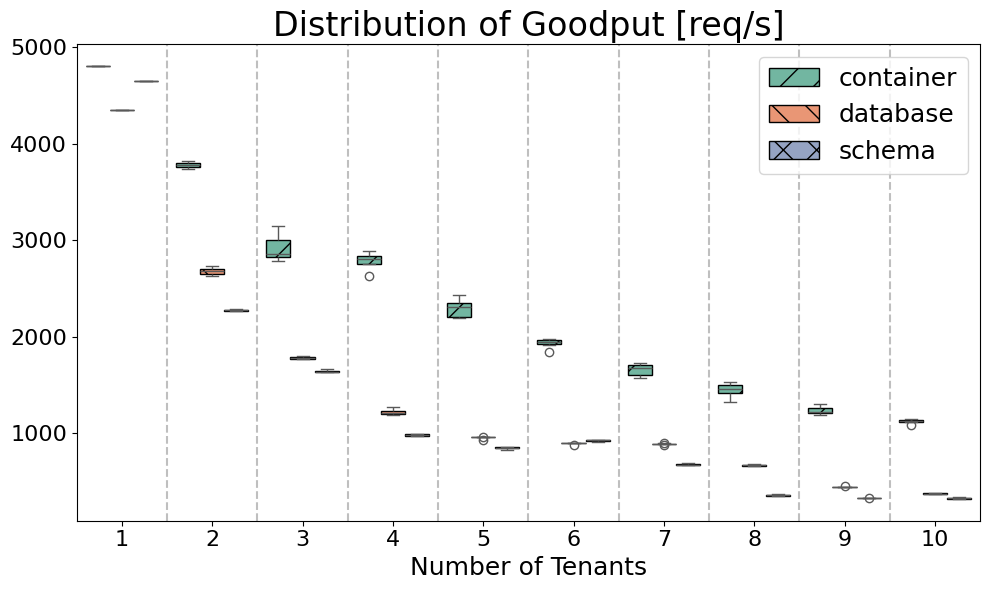

In [26]:
plot_boxplots(df_performance_first, y='Goodput (requests/second)', title='Distribution of Goodput [req/s]')

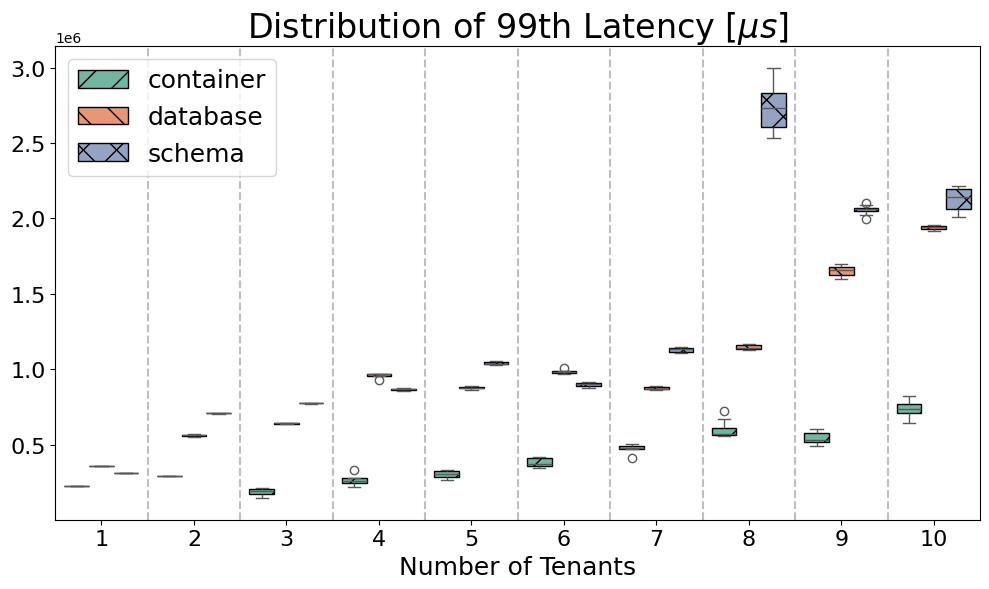

In [27]:
plot_boxplots(df_performance_first, y='Latency Distribution.99th Percentile Latency (microseconds)', title='Distribution of 99th Latency [$\mu s$]')

# Performance Results per Total

In [58]:
df_performance = collect.get_performance_all()

df_performance_first = df_performance[df_performance['client']=='1']
df_performance_second = df_performance[df_performance['client']=='2']

df_performance.dropna(inplace=True)

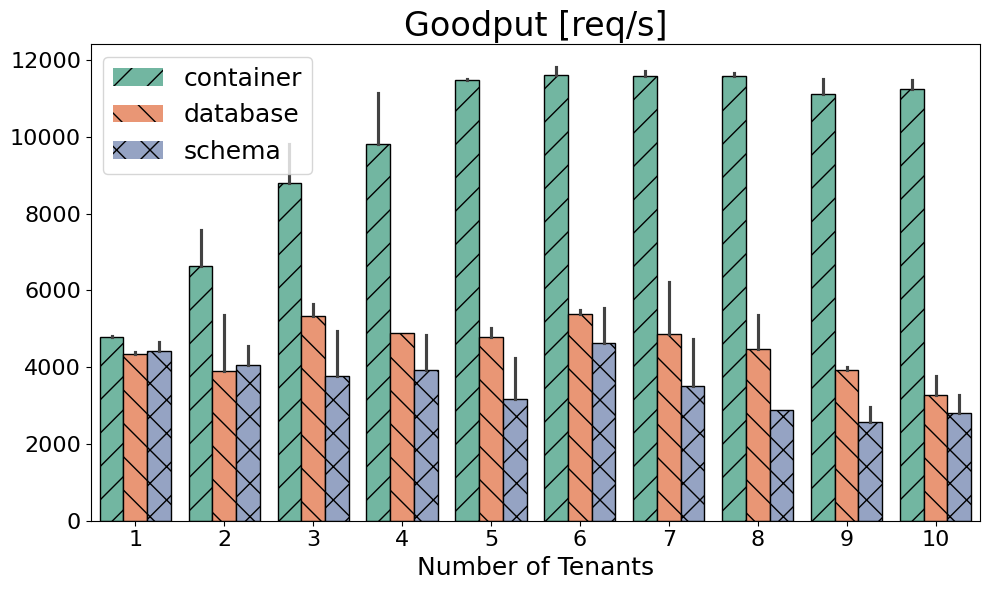

In [29]:
plot_bars(df_performance, y='Goodput (requests/second)', title='Goodput [req/s]', estimator='min')

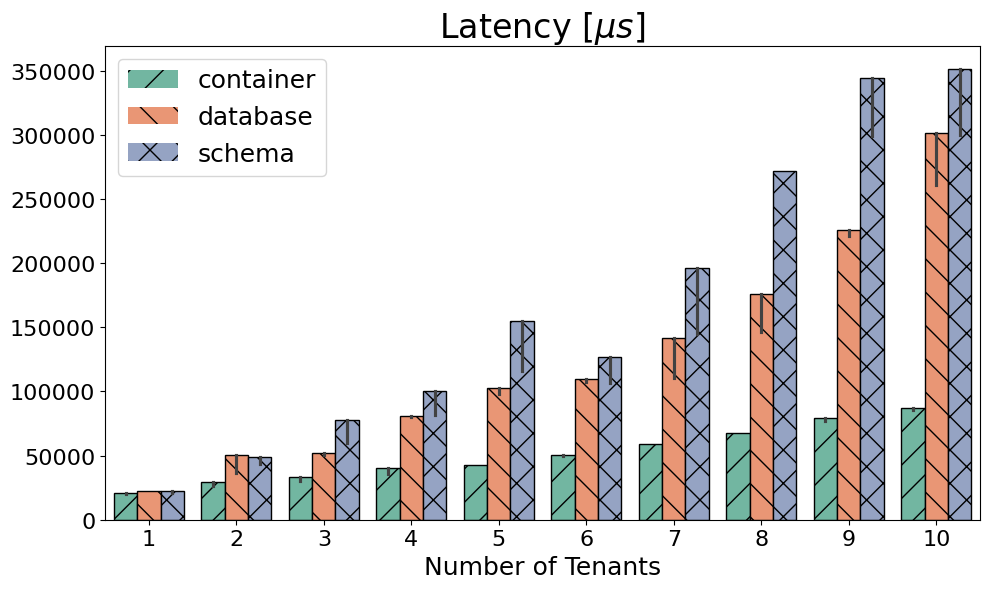

In [30]:
plot_bars(df_performance, y='Latency Distribution.Average Latency (microseconds)', title='Latency [$\mu s$]', estimator='max')

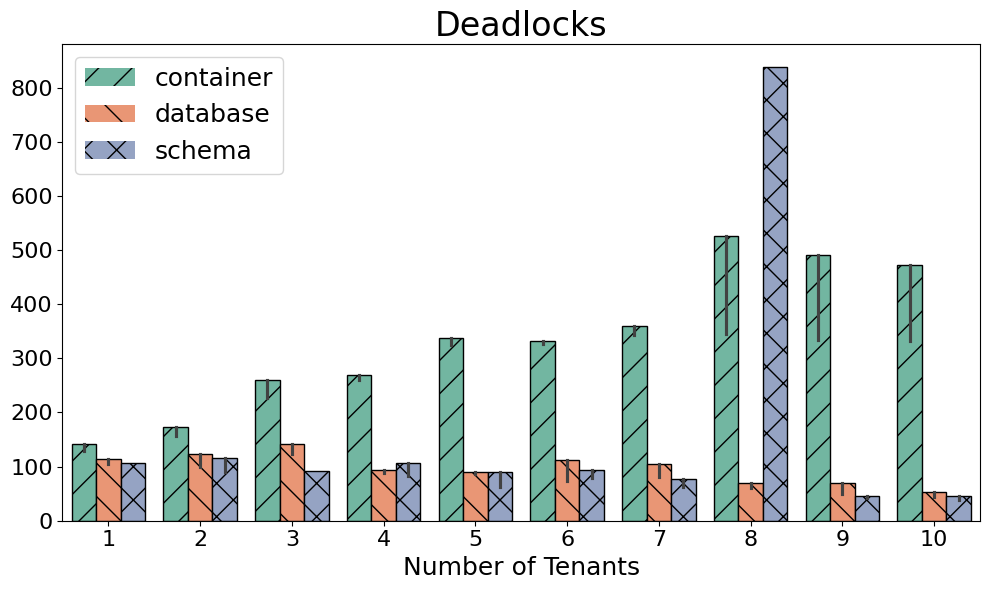

In [31]:
plot_bars(df_performance, y='num_errors', title='Deadlocks', estimator='max')

In [60]:
df_performance = collect.get_loading_time_max_all()

df_performance_first = df_performance[df_performance['client']=='1']
df_performance_second = df_performance[df_performance['client']=='2']

df_performance

time_load time_ingest time_check terminals pods  \
PostgreSQL-1-1-65536-0-1     254.0       114.0      139.0         1    1   
PostgreSQL-1-1-65536-0-2     254.0       114.0      139.0         1    1   
PostgreSQL-1-1-65536-1       305.0       134.0      171.0         1    1   
PostgreSQL-1-1-65536-2       305.0       134.0      171.0         1    1   
PostgreSQL-1-1-65536-1       255.0       114.0      141.0         1    1   
PostgreSQL-1-1-65536-2       255.0       114.0      141.0         1    1   
PostgreSQL-1-1-65536-0-1     354.0       149.0      204.0         1    1   
PostgreSQL-1-1-65536-0-2     354.0       149.0      204.0         1    1   
PostgreSQL-1-1-65536-1-1     352.0       148.0      203.0         1    1   
PostgreSQL-1-1-65536-1-2     352.0       148.0      203.0         1    1   
PostgreSQL-1-1-65536-1       440.0       205.0      234.0         1    2   
PostgreSQL-1-1-65536-2       440.0       205.0      234.0         1    2   
PostgreSQL-1-1-65536-1       539.0       243.0      295.0         1    2   
PostgreSQL-1-1-65536-2       539.0       243.0      295.0         1    2   
PostgreSQL-1-1-65536-0-1     296.0       121.0      175.0         1    1   
PostgreSQL-1-1-65536-0-2     296.0       121.0      175.0         1    1   
PostgreSQL-1-1-65536-1-1     317.0       143.0      174.0         1    1   
PostgreSQL-1-1-65536-1-2     317.0       143.0      174.0         1    1   
PostgreSQL-1-1-65536-2-1     313.0       139.0      174.0         1    1   
PostgreSQL-1-1-65536-2-2     313.0       139.0      174.0         1    1   
PostgreSQL-1-1-65536-1       565.0       264.0      298.0         1    3   
PostgreSQL-1-1-65536-2       565.0       264.0      298.0         1    3   
PostgreSQL-1-1-65536-1       787.0       364.0      420.0         1    3   
PostgreSQL-1-1-65536-2       787.0       364.0      420.0         1    3   
PostgreSQL-1-1-65536-0-1     390.0       179.0      210.0         1    1   
PostgreSQL-1-1-65536-0-2     390.0       179.0      210.0         1    1   
PostgreSQL-1-1-65536-1-1     376.0       167.0      209.0         1    1   
PostgreSQL-1-1-65536-1-2     376.0       167.0      209.0         1    1   
PostgreSQL-1-1-65536-2-1     367.0       158.0      209.0         1    1   
PostgreSQL-1-1-65536-2-2     367.0       158.0      209.0         1    1   
PostgreSQL-1-1-65536-3-1     360.0       152.0      208.0         1    1   
PostgreSQL-1-1-65536-3-2     360.0       152.0      208.0         1    1   
PostgreSQL-1-1-65536-1       987.0       468.0      516.0         1    4   
PostgreSQL-1-1-65536-2       987.0       468.0      516.0         1    4   
PostgreSQL-1-1-65536-1       801.0       375.0      423.0         1    4   
PostgreSQL-1-1-65536-2       801.0       375.0      423.0         1    4   
PostgreSQL-1-1-65536-0-1     308.0       126.0      182.0         1    1   
PostgreSQL-1-1-65536-0-2     308.0       126.0      182.0         1    1   
PostgreSQL-1-1-65536-1-1     311.0       130.0      181.0         1    1   
PostgreSQL-1-1-65536-1-2     311.0       130.0      181.0         1    1   
PostgreSQL-1-1-65536-2-1     316.0       136.0      180.0         1    1   
PostgreSQL-1-1-65536-2-2     316.0       136.0      180.0         1    1   
PostgreSQL-1-1-65536-3-1     311.0       131.0      180.0         1    1   
PostgreSQL-1-1-65536-3-2     311.0       131.0      180.0         1    1   
PostgreSQL-1-1-65536-4-1     299.0       120.0      179.0         1    1   
PostgreSQL-1-1-65536-4-2     299.0       120.0      179.0         1    1   
PostgreSQL-1-1-65536-1      1047.0       494.0      548.0         1    5   
PostgreSQL-1-1-65536-2      1047.0       494.0      548.0         1    5   
PostgreSQL-1-1-65536-1       995.0       470.0      520.0         1    5   
PostgreSQL-1-1-65536-2       995.0       470.0      520.0         1    5   
PostgreSQL-1-1-65536-0-1     323.0       134.0      189.0         1    1   
PostgreSQL-1-1-65536-0-2     323.0       134.0      189.0         1    1 

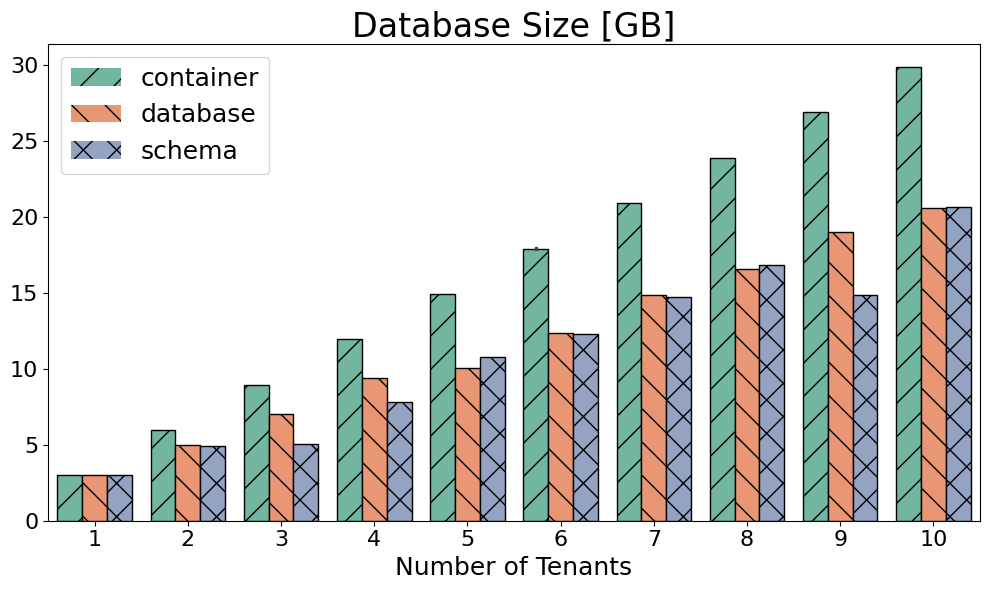

In [61]:
df_performance_first = df_performance[df_performance['client'] == '1']
# Divide datadisk by the count of rows with the same type and num_tenants
df = df_performance_first.copy()
# Create a mask for rows where type is not "container"
mask = df['type'] != 'container'

# Only apply the group count to the relevant rows
group_counts = df[mask].groupby(['type', 'num_tenants'])['datadisk'].transform('count')

# Initialize the column with NaN (or 0, if preferred)
df['datadisk_normalized'] = df['datadisk'] / 1024

# Apply the normalized value only where the mask is True
df.loc[mask, 'datadisk_normalized'] = df.loc[mask, 'datadisk'] / group_counts / 1024

plot_bars(df, y='datadisk_normalized', title='Database Size [GB]', estimator='sum')

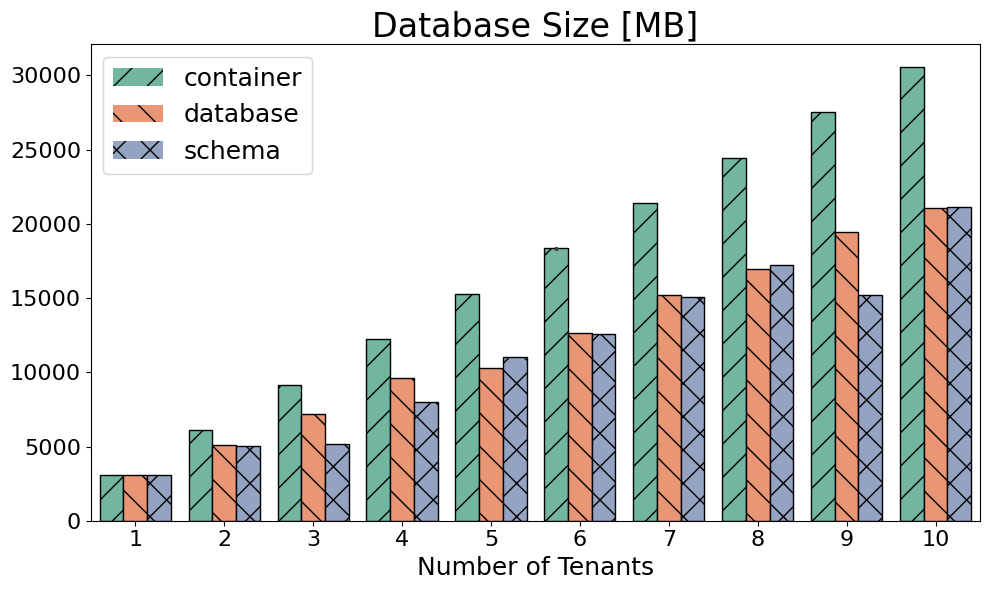

In [33]:
plot_bars(df_performance_first, y='datadisk', title='Database Size [MB]', estimator='sum')

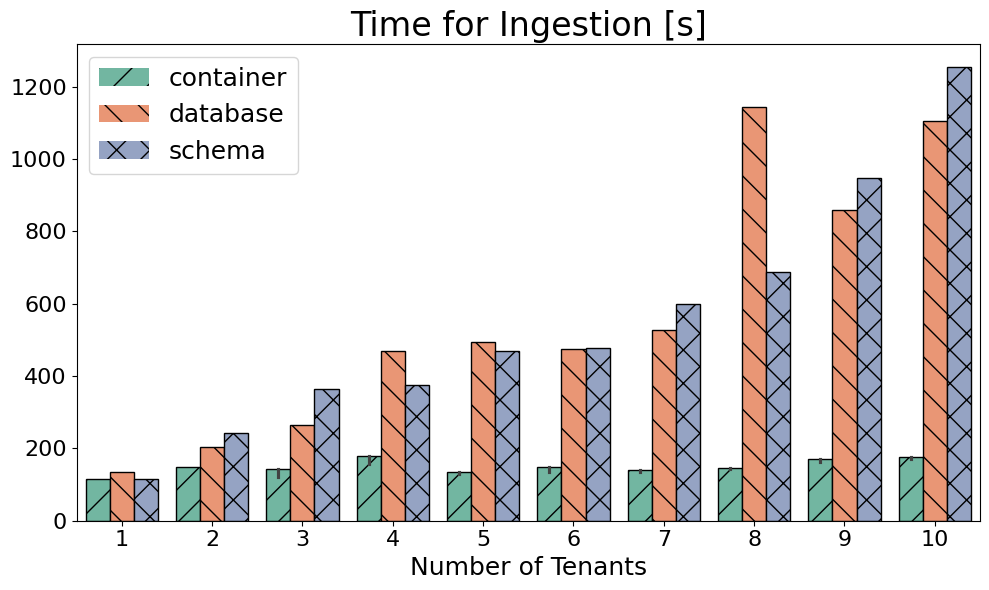

In [34]:
plot_bars(df_performance_first, y='time_ingest', title='Time for Ingestion [s]', estimator='max')

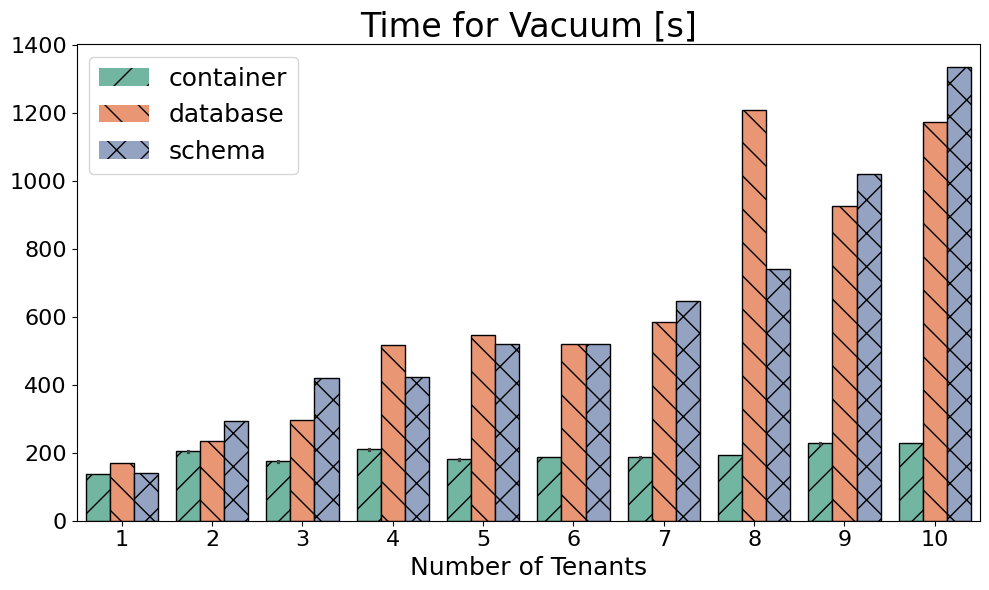

In [35]:
plot_bars(df_performance_first, y='time_check', title='Time for Vacuum [s]', estimator='max')

# Hardware Monitoring for Benchmarking Phase

In [36]:
df_performance = collect.get_monitoring_all(type="stream")

df_performance_first = df_performance[df_performance['client']=='1']
df_performance_second = df_performance[df_performance['client']=='2']

df_performance

client  CPU [CPUs]  Max RAM [Gb]  Max RAM Cached [Gb]  Max CPU  \
0      1    10252.49         10.27                20.51    19.80   
1      2     9472.46         12.66                24.22    20.37   
0      1     9819.37          9.87                19.65    20.21   
1      2     9139.90         12.27                25.92    16.82   
0      1    10805.14         10.23                21.41    22.59   
1      2     9690.51         12.49                24.67    21.79   
0      1    17190.01         18.99                37.28    31.42   
1      2    14738.99         22.59                43.91    33.81   
0      1    12663.66         13.23                29.74    24.07   
1      2     8457.31         15.34                30.36    22.40   
0      1    10968.99         13.00                27.64    23.27   
1      2     8816.80         14.94                30.21    20.35   
0      1    22695.28         27.35                51.43    51.15   
1      2    22120.61         32.43                60.70    47.10   
0      1    13892.28         16.46                37.64    29.88   
1      2    13861.99         19.93                51.25    28.62   
0      1    12123.96         16.09                32.70    27.58   
1      2     9907.10         18.34                38.53    26.38   
0      1    28753.61         36.22                63.83    55.98   
1      2    24274.49         41.59                71.66    58.41   
0      1    13557.00         19.34                39.82    31.96   
1      2    12634.34         22.55                44.44    28.54   
0      1    10484.06         18.50                36.63    31.42   
1      2    11945.45         21.89                42.98    28.95   
0      1    29519.64         43.37                69.10    56.11   
1      2    29135.05         49.70                81.81    57.53   
0      1    13501.19         22.14                46.21    35.79   
1      2    13235.47         25.63                49.17    32.80   
0      1    10850.13         21.71                41.96    31.57   
1      2     8847.88         23.90                44.29    26.24   
0      1    31868.89         50.73                78.48    57.70   
1      2    32079.23         57.68                93.45    58.18   
0      1    15892.58         26.07                51.88    36.48   
1      2    14874.82         29.90                55.95    37.53   
0      1    15961.53         26.84                54.04    35.82   
1      2    13552.54         29.97                55.56    32.44   
0      1    31782.91         58.35                87.76    59.76   
1      2    31959.39         64.89               102.68    58.21   
0      1    17412.42         29.79                62.09    37.23   
1      2    14662.69         32.46                58.70    33.74   
0      1    13961.91         28.81                55.84    35.46   
1      2     9988.66         31.24                56.21    32.55   
0      1    33888.22         65.37                97.64    59.87   
1      2    31330.43         71.93               111.65    63.39   
0      1    15905.61         32.21                63.47    37.14   
1      2    12466.94         34.71                61.48    35.50   
0      1     8727.47         28.13                56.26    19.33   
1      2        0.00          9.23                37.70     0.00   
0      1    31675.06         72.54               106.29    58.70   
1      2    32941.12         79.48               122.98    60.56   
0      1    11532.52         32.07                64.77    27.12   
1      2    11007.52         35.41                71.34    27.47   
0      1     9062.82         31.03                55.73    21.23   
1      2     7091.20         33.17                58.15    18.85   
0      1    32454.35         79.99               117.46    59.40   
1      2    32765.65         86.38               131.00    63.40   
0      1    10356.22         34.21                67.87    28.63   
1      2     9827.41         36.64                72.88   

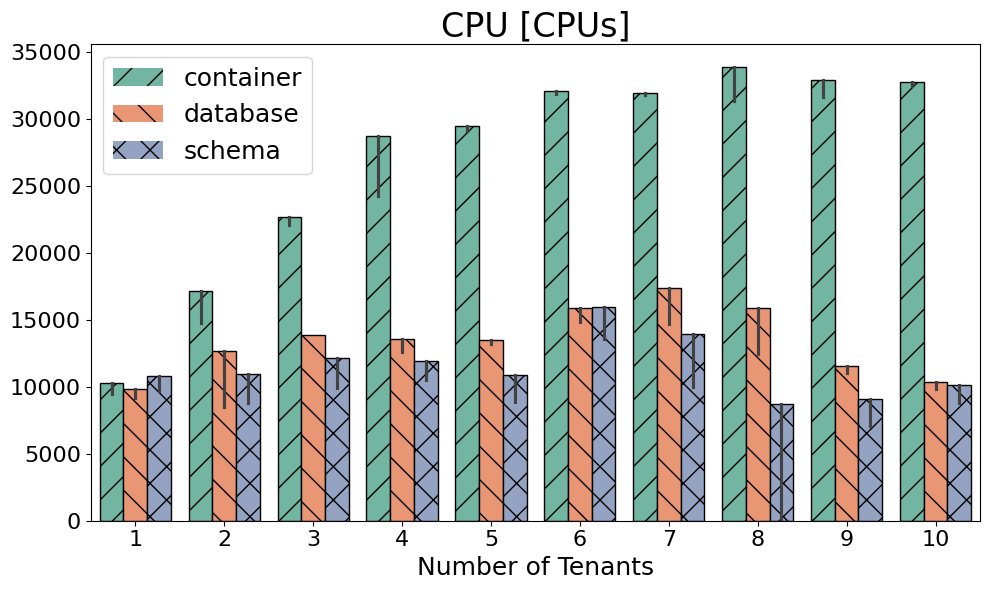

In [37]:
plot_bars(df_performance, y='CPU [CPUs]', title='CPU [CPUs]', estimator='max')

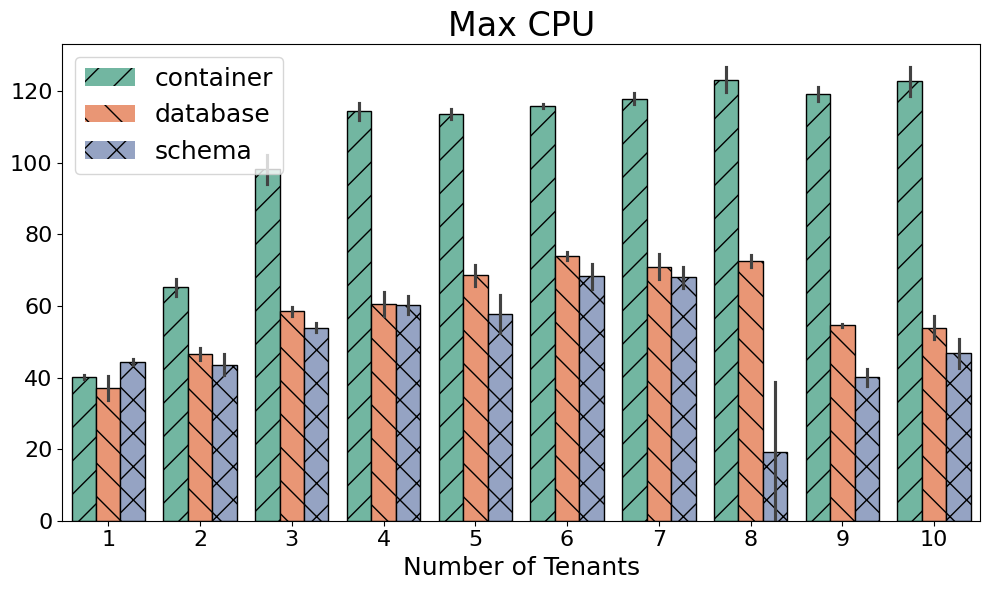

In [38]:
plot_bars(df_performance, y='Max CPU', title='Max CPU', estimator='sum')

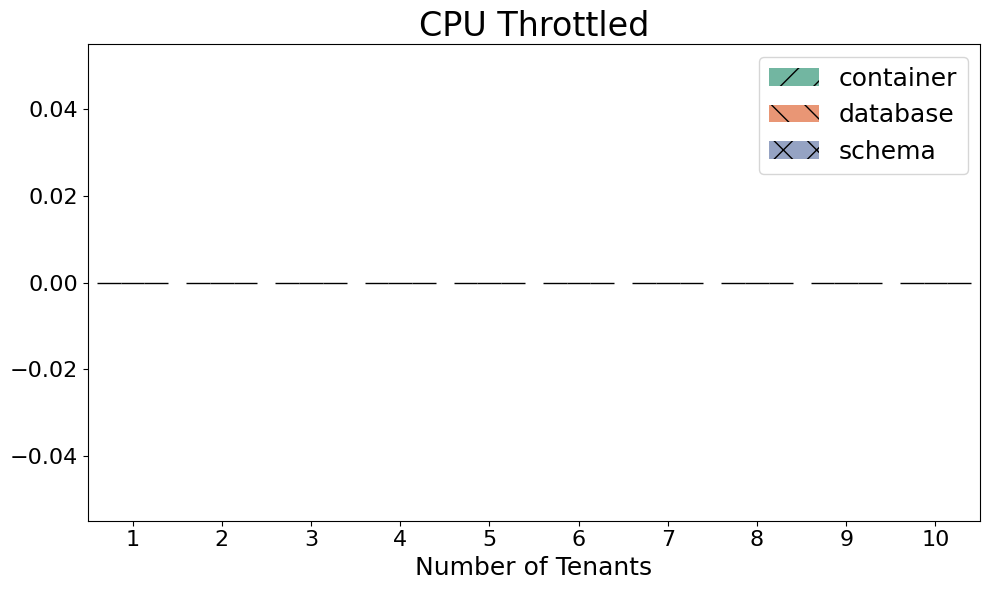

In [39]:
plot_bars(df_performance, y='CPU Throttled', title='CPU Throttled', estimator='sum')

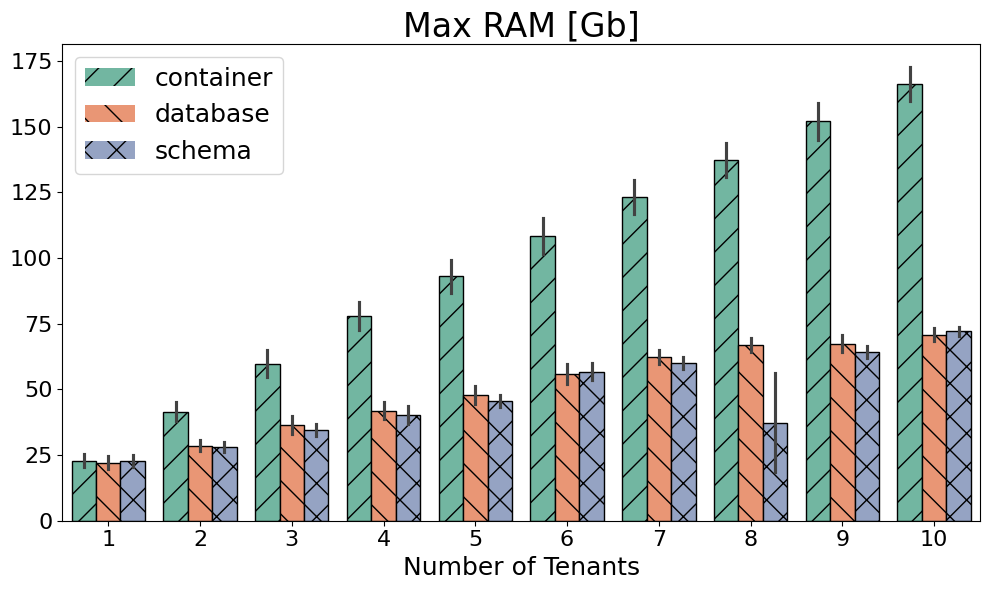

In [40]:
plot_bars(df_performance, y='Max RAM [Gb]', title='Max RAM [Gb]', estimator='sum')

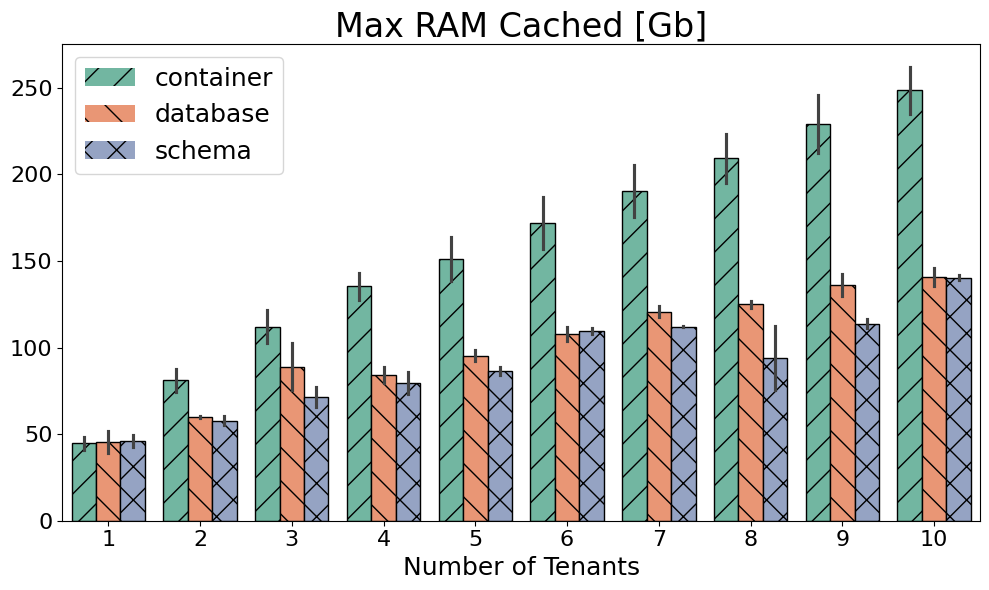

In [41]:
plot_bars(df_performance, y='Max RAM Cached [Gb]', title='Max RAM Cached [Gb]', estimator='sum')

# Hardware Monitoring for Loading Phase

In [42]:
df_performance = collect.get_monitoring_all("loading")

df_performance_first = df_performance[df_performance['client']=='1']
df_performance_second = df_performance[df_performance['client']=='2']

df_performance

client  CPU [CPUs]  Max RAM [Gb]  Max RAM Cached [Gb]  Max CPU  \
0      1      248.49          6.29                 8.32     3.86   
1      2      248.49          6.29                 8.32     3.86   
0      1      392.84          6.46                 9.24     3.31   
1      2      392.84          6.46                 9.24     3.31   
0      1      302.94          6.31                 8.54     4.23   
1      2      302.94          6.31                 8.54     4.23   
0      1      909.03         12.86                18.82     5.69   
1      2      909.03         12.86                18.82     5.69   
0      1      868.02          7.65                12.60     4.16   
1      2      868.02          7.65                12.60     4.16   
0      1      804.77          7.55                13.14     3.38   
1      2      804.77          7.55                13.14     3.38   
0      1     1241.16         19.32                27.95     7.79   
1      2     1241.16         19.32                27.95     7.79   
0      1     1395.76          8.50                16.62     6.62   
1      2     1395.76          8.50                16.62     6.62   
0      1     1472.10          8.66                16.12     4.01   
1      2     1472.10          8.66                16.12     4.01   
0      1     1790.67         25.78                37.69    12.01   
1      2     1790.67         25.78                37.69    12.01   
0      1     2002.30          9.95                19.64     4.84   
1      2     2002.30          9.95                19.64     4.84   
0      1     1897.68          9.83                19.93     8.59   
1      2     1897.68          9.83                19.93     8.59   
0      1     2341.32         32.75                47.61    15.95   
1      2     2341.32         32.75                47.61    15.95   
0      1     2850.40         11.09                24.26     6.94   
1      2     2850.40         11.09                24.26     6.94   
0      1     2582.08         10.96                22.57     9.19   
1      2     2582.08         10.96                22.57     9.19   
0      1     3097.74         39.27                57.15    16.98   
1      2     3097.74         39.27                57.15    16.98   
0      1     3207.75         11.94                26.74    11.31   
1      2     3207.75         11.94                26.74    11.31   
0      1     2963.13         12.18                27.32    10.27   
1      2     2963.13         12.18                27.32    10.27   
0      1     3281.38         45.42                65.81    24.68   
1      2     3281.38         45.42                65.81    24.68   
0      1     4125.92         13.65                31.50    12.48   
1      2     4125.92         13.65                31.50    12.48   
0      1     3576.29         13.47                30.82     9.70   
1      2     3576.29         13.47                30.82     9.70   
0      1     3858.86         52.33                75.93    23.80   
1      2     3858.86         52.33                75.93    23.80   
0      1     4676.30         14.73                32.98    10.63   
1      2     4676.30         14.73                32.98    10.63   
0      1     4327.05         14.78                34.82    10.45   
1      2     4327.05         14.78                34.82    10.45   
0      1     4403.99         57.94                84.64    28.03   
1      2     4403.99         57.94                84.64    28.03   
0      1     5151.90         16.34                37.92    10.09   
1      2     5151.90         16.34                37.92    10.09   
0      1     4899.50         16.15                37.96     8.83   
1      2     4899.50         16.15                37.96     8.83   
0      1     5053.62         64.39                94.10    27.09   
1      2     5053.62         64.39                94.10    27.09   
0      1     6203.78         17.92                41.31     9.50   
1      2     6203.78         17.92                41.31   

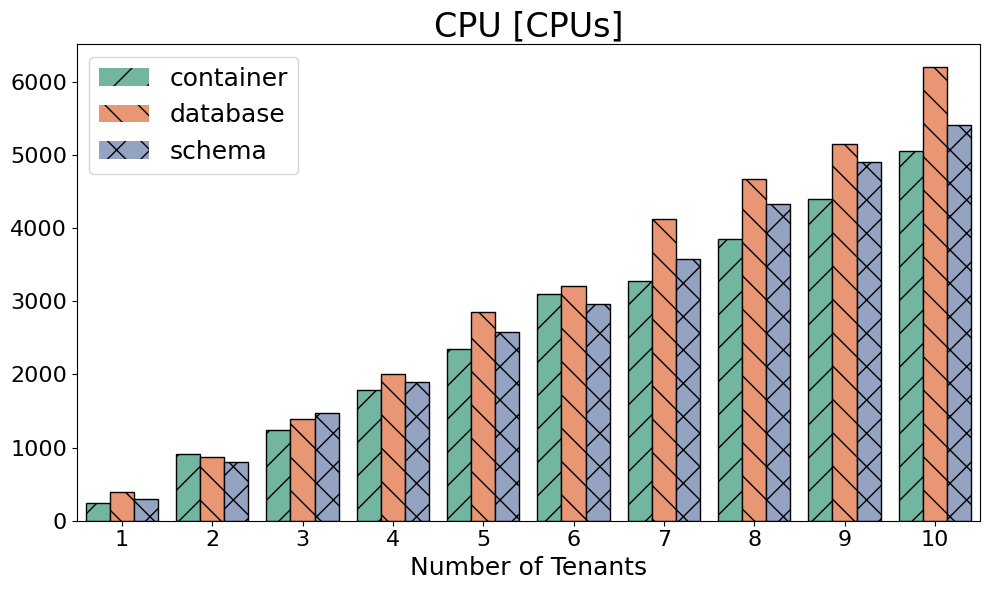

In [43]:
plot_bars(df_performance, y='CPU [CPUs]', title='CPU [CPUs]', estimator='max')

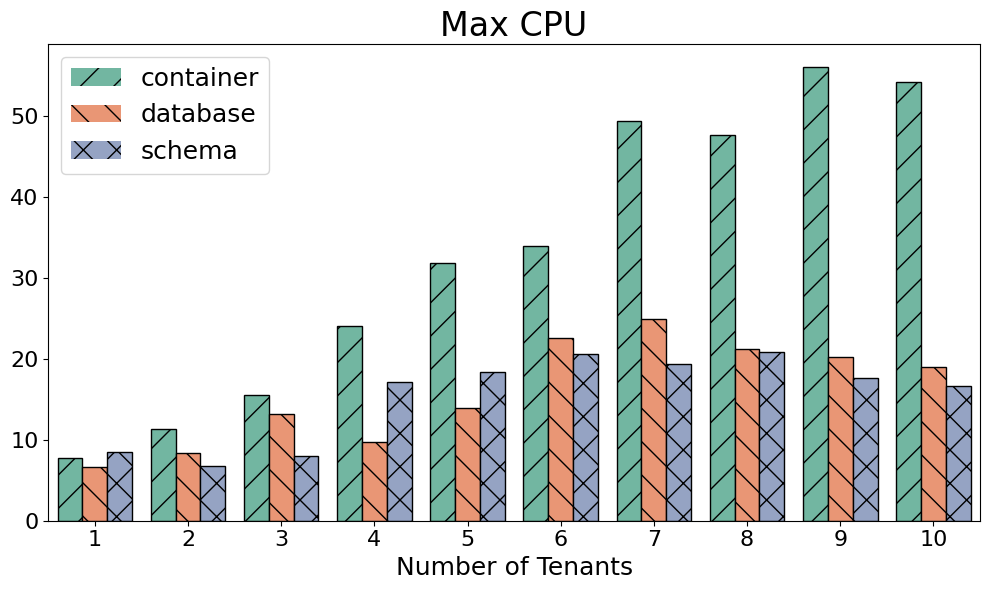

In [44]:
plot_bars(df_performance, y='Max CPU', title='Max CPU', estimator='sum')

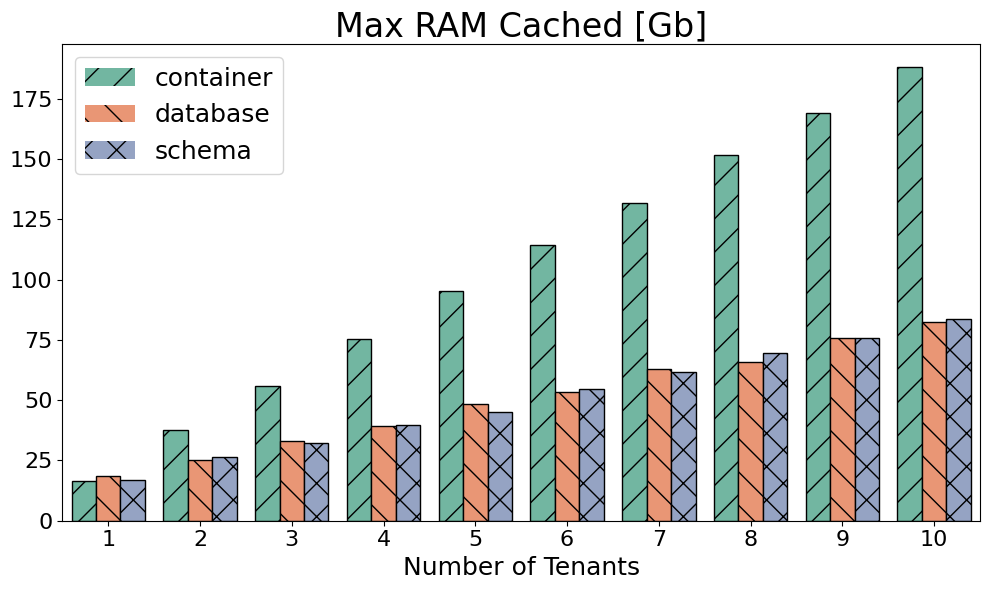

In [45]:
plot_bars(df_performance, y='Max RAM Cached [Gb]', title='Max RAM Cached [Gb]', estimator='sum')

# Efficiency

In [46]:
client = '1'

df_performance_monitoring = collect.get_monitoring_all(type="stream")
df_performance_monitoring = df_performance_monitoring[df_performance_monitoring['client'] == client]
df_performance = collect.get_performance_all()
df_performance = df_performance[df_performance['client'] == client]
merged_df = pd.merge(df_performance, df_performance_monitoring, on=['type', 'num_tenants'], how='inner')
#merged_df['I_Lat'] = 1./merged_df['E_Lat']
merged_df['E_Tpx'] = merged_df['Goodput (requests/second)'] / merged_df['CPU [CPUs]'] * 600.
merged_df['E_Lat'] = 1./np.sqrt(merged_df['Latency Distribution.Average Latency (microseconds)']*merged_df['CPU [CPUs]']/1E6)
merged_df['E_RAM'] = (merged_df['Goodput (requests/second)']) / merged_df['Max RAM [Gb]']
merged_df

client_x  Goodput (requests/second)  num_errors  \
0         1                4803.003214         129   
1         1                4349.368288         105   
2         1                4651.953220         106   
3         1                7563.367986         174   
4         1                5358.271400         124   
5         1                4550.894645         116   
6         1                8788.219632         226   
7         1                5346.994546         124   
8         1                4931.253076          92   
9         1               11134.096226         259   
10        1                4884.149645          88   
11        1                3928.136529          82   
12        1               11490.532312         325   
13        1                4774.561373          86   
14        1                4250.009790          90   
15        1               11602.144311         332   
16        1                5387.221396          73   
17        1                5538.450883          94   
18        1               11593.094489         343   
19        1                6221.282893         104   
20        1                4748.261453          77   
21        1               11593.144506         344   
22        1                5371.104639          69   
23        1                2874.901523         838   
24        1               11121.181790         334   
25        1                4006.444791          70   
26        1                2960.414846          42   
27        1               11258.076070         332   
28        1                3769.021512          44   
29        1                3283.582344          39   

    Latency Distribution.Average Latency (microseconds)  \
0                                          20447.000000   
1                                          22579.000000   
2                                          21112.000000   
3                                          25974.000000   
4                                          36668.500000   
5                                          43176.000000   
6                                          33627.333333   
7                                          50661.666667   
8                                          59806.333333   
9                                          35312.250000   
10                                         80573.500000   
11                                        100158.250000   
12                                         42778.400000   
13                                        103063.600000   
14                                        115771.800000   
15                                         50785.666667   
16                                        109577.166667   
17                                        106539.500000   
18                                         59323.857143   
19                                        110667.428571   
20                                        145072.857143   
21                                         67890.125000   
22                                        146477.500000   
23                                        271827.500000   
24                                         79516.777778   
25                                        221198.000000   
26                                        299393.555556   
27                                         87210.900000   
28                                        261289.500000   
29                                        299893.700000   

    Latency Distribution.99th Percentile Latency (microseconds)       type  \
0                                                      227816.0  container   
1                                                      359374.0   database   
2                                                      315305.0     schema   
3                                                      291077.0  container   
4                                                      569780.0   database   
5                             

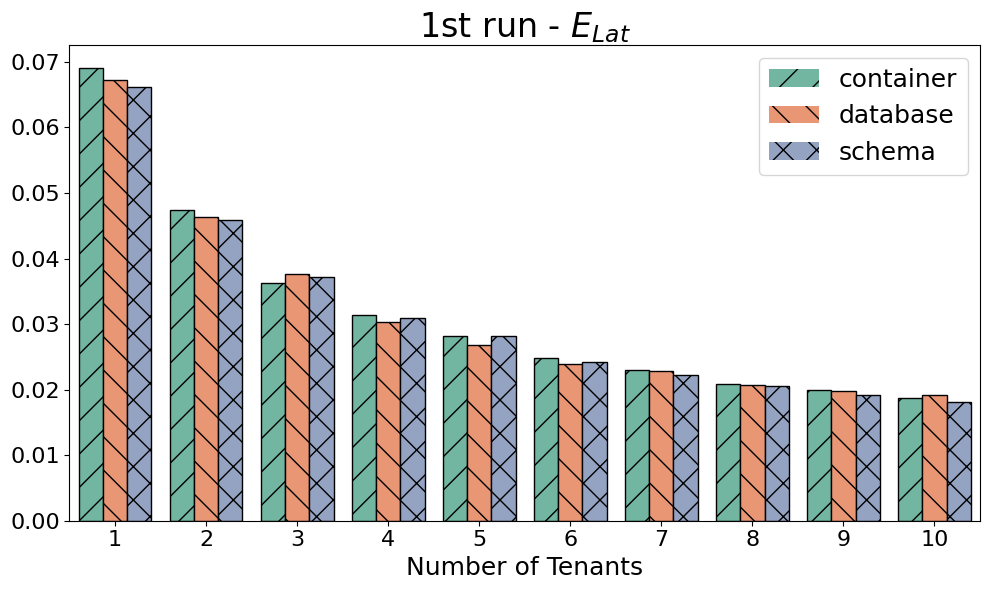

In [47]:
plot_bars(merged_df, y='E_Lat', title='1st run - $E_{Lat}$', estimator='max')

In [48]:
#plot_bars(merged_df, y='I_Lat', title='1st run - $I_{Lat}$', estimator='max')

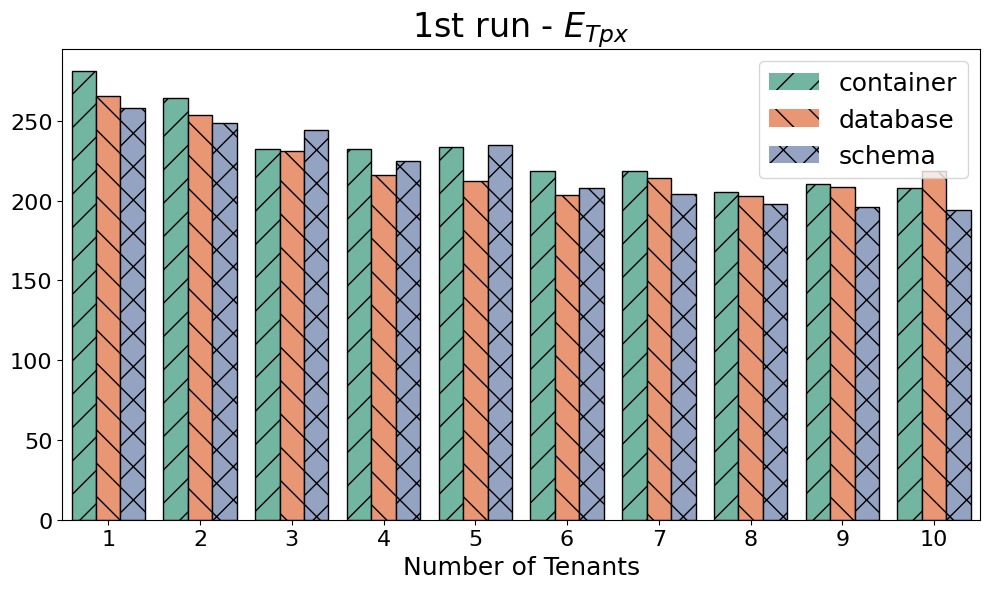

In [49]:
plot_bars(merged_df, y='E_Tpx', title='1st run - $E_{Tpx}$', estimator='max')

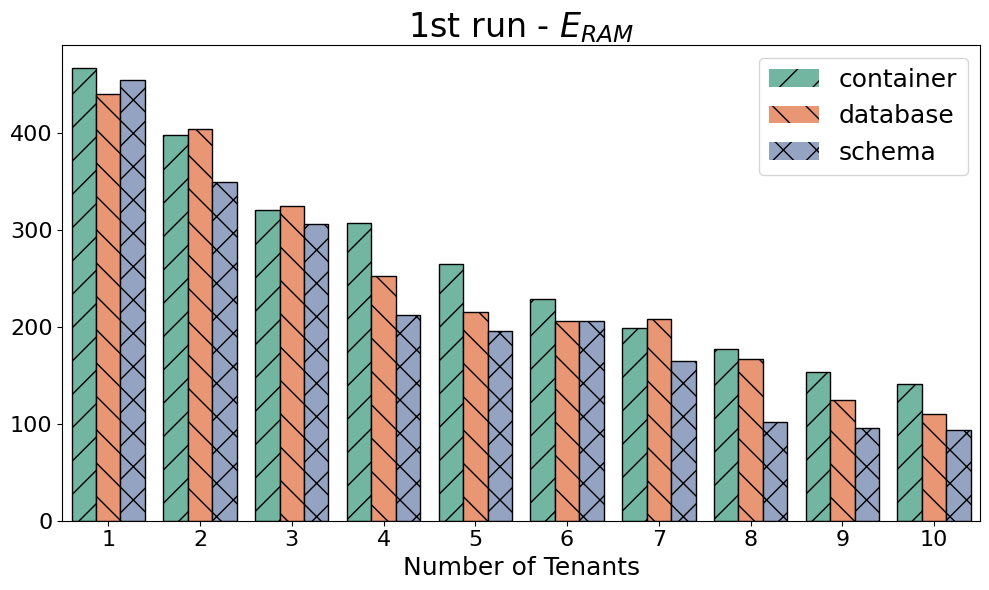

In [50]:
plot_bars(merged_df, y='E_RAM', title='1st run - $E_{RAM}$', estimator='min')

In [51]:
client = '2'

df_performance_monitoring = collect.get_monitoring_all(type="stream")
df_performance_monitoring = df_performance_monitoring[df_performance_monitoring['client'] == client]
df_performance = collect.get_performance_all()
df_performance = df_performance[df_performance['client'] == client]
merged_df = pd.merge(df_performance, df_performance_monitoring, on=['type', 'num_tenants'], how='inner')
#merged_df['CPUs/Request'] = merged_df['CPU [CPUs]'] / merged_df['Goodput (requests/second)'] / 600.
merged_df['E_Tpx'] = merged_df['Goodput (requests/second)'] / merged_df['CPU [CPUs]'] * 600.
merged_df['E_Lat'] = 1./np.sqrt(merged_df['Latency Distribution.Average Latency (microseconds)']*merged_df['CPU [CPUs]']/1E6)
merged_df['E_RAM'] = (merged_df['Goodput (requests/second)']) / merged_df['Max RAM [Gb]']

merged_df

client_x  Goodput (requests/second)  num_errors  \
0         2                4775.036305         141   
1         2                4401.014906         114   
2         2                4423.826299         106   
3         2                6627.066247         157   
4         2                3898.443027          99   
5         2                4048.093120          90   
6         2                9826.306479         259   
7         2                5650.743088         142   
8         2                3782.338173          91   
9         2                9828.176354         269   
10        2                4890.413065          94   
11        2                4830.199691         107   
12        2               11518.649200         337   
13        2                5027.397978          90   
14        2                3176.061445          63   
15        2               11822.881031         327   
16        2                5481.891462         113   
17        2                4640.276315          78   
18        2               11720.124295         359   
19        2                4873.264672          80   
20        2                3513.441429          63   
21        2               11658.256183         526   
22        2                4470.894858          61   
23        2                   0.000000           0   
24        2               11523.142684         491   
25        2                3928.051429          50   
26        2                2569.979892          46   
27        2               11490.243854         473   
28        2                3266.958139          53   
29        2                2795.903219          45   

    Latency Distribution.Average Latency (microseconds)  \
0                                          20555.000000   
1                                          22306.000000   
2                                          22195.000000   
3                                          29624.000000   
4                                          50412.000000   
5                                          48558.000000   
6                                          29993.333333   
7                                          52170.333333   
8                                          77926.666667   
9                                          40021.000000   
10                                         80427.500000   
11                                         81463.750000   
12                                         42578.200000   
13                                         97863.200000   
14                                        154874.600000   
15                                         49873.166667   
16                                        107770.666667   
17                                        127230.000000   
18                                         58708.428571   
19                                        141361.857143   
20                                        196041.428571   
21                                         67899.750000   
22                                        176194.875000   
23                                                  NaN   
24                                         76775.888889   
25                                        225615.000000   
26                                        344674.555556   
27                                         85788.300000   
28                                        301453.700000   
29                                        351860.500000   

    Latency Distribution.99th Percentile Latency (microseconds)       type  \
0                                                      223895.0  container   
1                                                      333160.0   database   
2                                                      349270.0     schema   
3                                                      293306.0  container   
4                                                      733821.0   database   
5                             

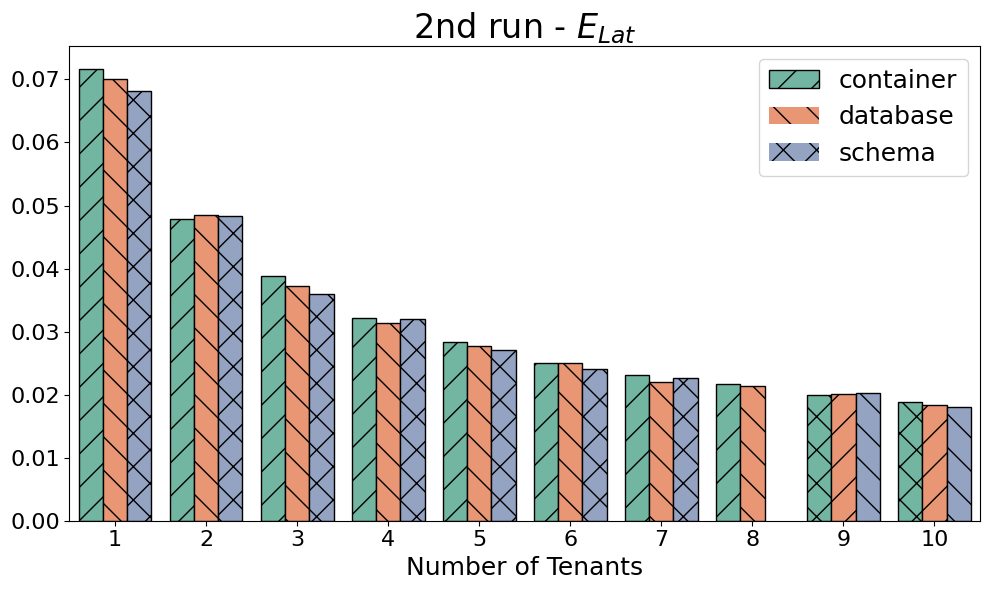

In [52]:
plot_bars(merged_df, y='E_Lat', title='2nd run - $E_{Lat}$', estimator='max')

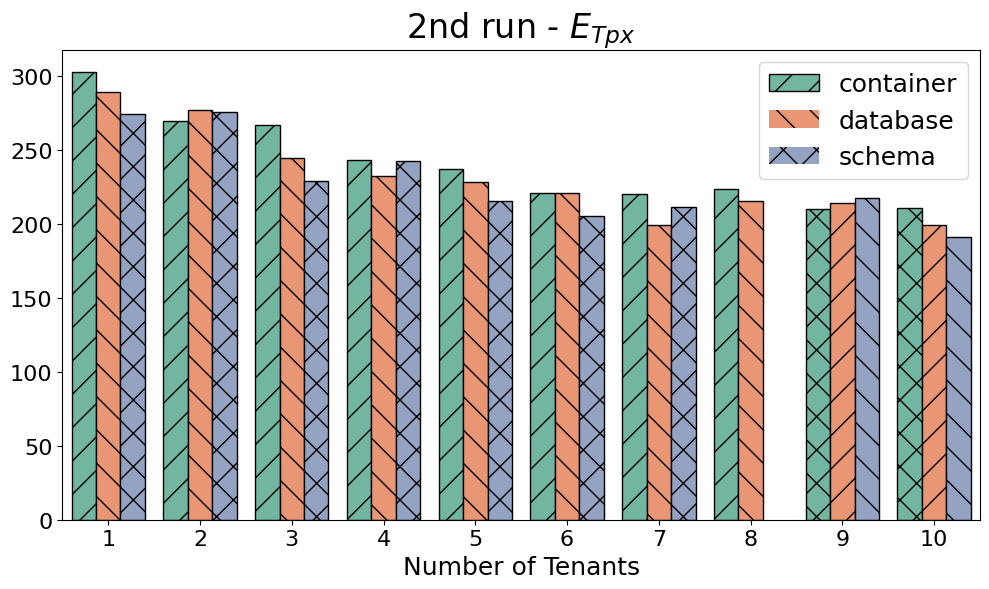

In [53]:
plot_bars(merged_df, y='E_Tpx', title='2nd run - $E_{Tpx}$', estimator='max')

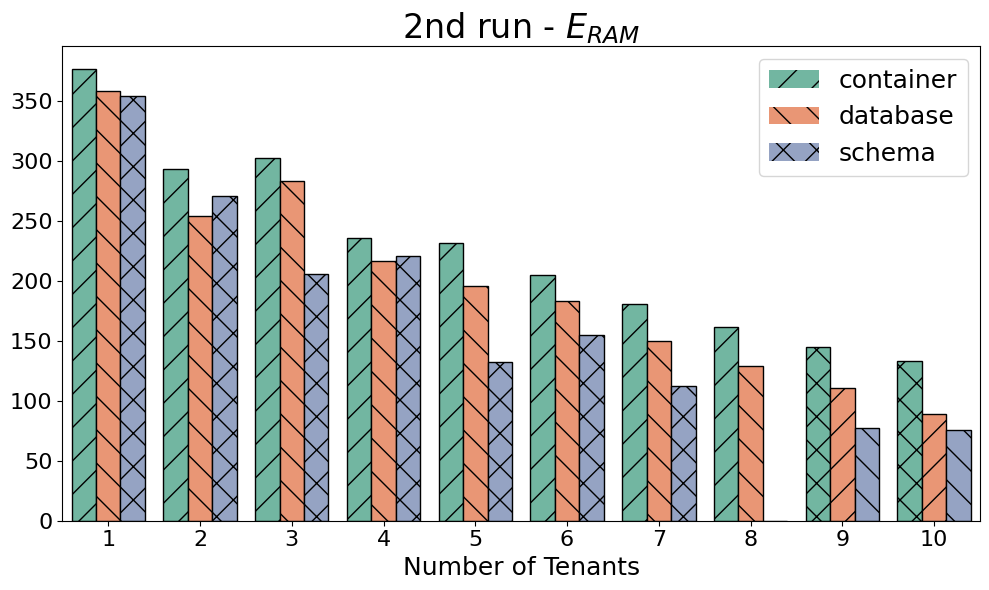

In [54]:
plot_bars(merged_df, y='E_RAM', title='2nd run - $E_{RAM}$', estimator='max')

In [55]:
import os
import zipfile

def zip_all_results():
    # Set the base directory containing the folders
    base_dir = path # "/path/to/your/folders"  # CHANGE THIS to your actual directory
    # List all folder names in the directory
    folder_names = codes
    # Create a zip for each folder
    for folder in folder_names:
        folder_path = os.path.join(base_dir, folder)
        zip_path = os.path.join(base_dir, f"{folder}.zip")
        print(f"Zipping {folder_path} to {zip_path}...")
        with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
            for root, _, files in os.walk(folder_path):
                for file in files:
                    abs_path = os.path.join(root, file)
                    rel_path = os.path.relpath(abs_path, folder_path)
                    zipf.write(abs_path, arcname=os.path.join(folder, rel_path))
    print("✅ Done zipping all folders.")


In [56]:
#zip_all_results()